Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.



Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
# importing all of the libraries that I might need

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the CSV and also creating a copy to work with
# After initial head() viewing, added index_col = 0 to get rid of the duplicate column labeling between CSV and pandas 
data = pd.read_csv('Loan_Modelling.csv', index_col = 0)
df = data.copy()

In [4]:
# look at the top 10 header
df.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49    91107       4    1.6          1         0   
2    45          19      34    90089       3    1.5          1         0   
3    39          15      11    94720       1    1.0          1         0   
4    35           9     100    94112       1    2.7          2         0   
5    35           8      45    91330       4    1.0          2         0   
6    37          13      29    92121       4    0.4          2       155   
7    53          27      72    91711       2    1.5          2         0   
8    50          24      22    93943       1    0.3          3         0   
9    35          10      81    90089       3    0.6          2       104   
10   34           9     180    93023       1    8.9          3         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1  
6               0                   0           0       1           0  
7               0                   0           0       1           0  
8               0                   0           0       0           1  
9               0                   0           0       1           0  
10              1                   0           0       0           0

In [5]:
df.tail(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
4991   55          25      58    95023       4   2.00          3       219   
4992   51          25      92    91330       1   1.90          2       100   
4993   30           5      13    90037       4   0.50          3         0   
4994   45          21     218    91801       2   6.67          1         0   
4995   64          40      75    94588       3   2.00          3         0   
4996   29           3      40    92697       1   1.90          3         0   
4997   30           4      15    92037       4   0.40          1        85   
4998   63          39      24    93023       2   0.30          3         0   
4999   65          40      49    90034       3   0.50          2         0   
5000   28           4      83    92612       3   0.80          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
4991              0                   0           0       0           1  
4992              0                   0           0       0           1  
4993              0                   0           0       0           0  
4994              0                   0           0       1           0  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       1           0  
4998              0                   0           0       0           0  
4999              0                   0           0       1           0  
5000              0                   0           0       1           1

In [6]:
# looking at 10 random rows of data 
np.random.seed(1)
df.sample(n=10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
2765   31           5      84    91320       1    2.9          3       105   
4768   35           9      45    90639       3    0.9          1       101   
3815   34           9      35    94304       3    1.3          1         0   
3500   49          23     114    94550       1    0.3          1       286   
2736   36          12      70    92131       3    2.6          2       165   
3923   31           4      20    95616       4    1.5          2         0   
2702   50          26      55    94305       1    1.6          2         0   
1180   36          11      98    90291       3    1.2          3         0   
933    51          27     112    94720       3    1.8          2         0   
793    41          16      98    93117       1    4.0          3         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
2765              0                   0           0       0           1  
4768              0                   1           0       0           0  
3815              0                   0           0       0           0  
3500              0                   0           0       1           0  
2736              0                   0           0       1           0  
3923              0                   0           0       1           0  
2702              0                   0           0       1           0  
1180              0                   1           0       0           1  
933               0                   1           1       1           1  
793               0                   0           0       0           1

In [7]:
df.info()
# Everything is already in numerical format - even the Categorical Series (e.g. Personal_Loan)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [8]:
df.nunique()
# checking the number of unique values in each column

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

In [9]:
df.shape
# rows x columns size

(5000, 13)

In [10]:
# Nothing duplicated? No
sum(df.duplicated())

0

In [11]:
df.isnull().sum()
# checking for null values - none

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
df.describe()
# Initial statistical overview of the dataset

Age   Experience       Income       ZIPCode       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93169.257000     2.396400   
std      11.463166    11.467954    46.033729   1759.455086     1.147663   
min      23.000000    -3.000000     8.000000  90005.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

# No observed missing values
# Issue with Experience having negative values - will need to fix

In [13]:
(df['Experience'] < 0).sum()
# there are 52 negative values in the Experience column

52

In [14]:
df.sort_values(by=["Experience"], ascending=True)
# sort the data ascending so we can see the initial negative values in the Experience Column

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                           
4515   24          -3      41    91768       4    1.0          3         0   
2619   23          -3      55    92704       3    2.4          2       145   
4286   23          -3     149    93555       2    7.2          1         0   
3627   24          -3      28    90089       4    1.0          3         0   
3797   24          -2      50    94920       3    2.4          2         0   
...   ...         ...     ...      ...     ...    ...        ...       ...   
1481   67          42      32    93943       1    1.1          3         0   
466    66          42      35    94305       1    1.9          2       172   
2847   67          43     105    93711       4    1.7          2         0   
3887   67          43      79    95616       4    1.7          2       215   
4361   67          43      41    90024       2    1.1          1         0   

      Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                       
4515              0                   0           0       1           0  
2619              0                   0           0       1           0  
4286              0                   0           0       1           0  
3627              0                   0           0       0           0  
3797              0                   1           0       0           0  
...             ...                 ...         ...     ...         ...  
1481              0                   0           0       0           1  
466               0                   0           0       1           0  
2847              0                   0           0       1           0  
3887              0                   0           1       1           1  
4361              0                   0           0       0           0  

[5000 rows x 13 columns]

# Observation
# from sorting the df by 'Experience', it appears that the Negative Values were
# just a typo and should be converted to Positive Values

In [15]:
# Creating a function to convert negative values to positive
def convert_negatives(value):
    if value < 0:
        return value * -1 # if negative, multiply the value by negative 1 to convert it to positive
    else:
        return value # if positive, do nothing

In [16]:
# apply the convert_negative() function to the entire Column of 'Experience'
df['Experience'] = df['Experience'].apply(convert_negatives)

In [17]:
# double check that the Experience Column no longer has 
df.describe()

Age   Experience       Income       ZIPCode       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.134600    73.774200  93169.257000     2.396400   
std      11.463166    11.415189    46.033729   1759.455086     1.147663   
min      23.000000     0.000000     8.000000  90005.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

In [18]:
df['Personal_Loan'].sum()
# 480 customers (out of 5000) took a personal loan during the last Sales Campaign - so this might be a good dataset to pull and 
# identify 'drivers' that might indicate likeliness of getting a loan - using bivariate analysis techniques
# e.g. Advertise to customers with this education level and in this age group (Potential recommendation)

480

In [19]:
# Defining a Function to get the first digit from the ZIPCode Column and this value is the National Area
def first_number(zip_code):
    return int(str(zip_code)[0:3]) # convert the zip code to string to allow parsing, grab first 3 numbers, convert back to int

In [20]:
# make sure it works - should pull '797'
test_zip = 79705
print(first_number(test_zip))

797


In [21]:
# Apply the new first_number() function to the entire Series of ZIPCode
df['ZIPCode'] = df['ZIPCode'].apply(first_number)

In [22]:
# double check to see if first_number() function worked
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49      911       4    1.6          1         0   
2    45          19      34      900       3    1.5          1         0   
3    39          15      11      947       1    1.0          1         0   
4    35           9     100      941       1    2.7          2         0   
5    35           8      45      913       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
ID                                                                     
1               0                   1           0       0           0  
2               0                   1           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           0  
5               0                   0           0       0           1

In [23]:
# make sure that ZIPCode is an int64 Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [24]:
# defining a function to plot boxplot above a histogram - plus formatting the background, size and colors
def histogram_boxplot(feature, figsize=(15,10), bins=None):
    f2, (ax_box2, ax_hist2, ) = plt.subplots(nrows = 2, # number of rows of the subplot grid
                                          sharex = False, #x-axis will NOT be shared among subplots
                                          gridspec_kw = {"height_ratios": (.25, .75)},
                                          figsize = figsize
                                          ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='navy') # boxplot will be created and a triangle will show the mean
    sns.distplot(feature, kde=False, ax=ax_hist2, bins = bins, color="navy") if bins else sns.distplot(feature, kde=False, color = 'navy')
    ax_hist2.axvline(np.mean(feature), color='blue', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') #Add median to histogram
    ax_box2.set_facecolor("whitesmoke") #adding a background color to boxplot
    ax_hist2.set_facecolor("whitesmoke") #adding a background color to histogram

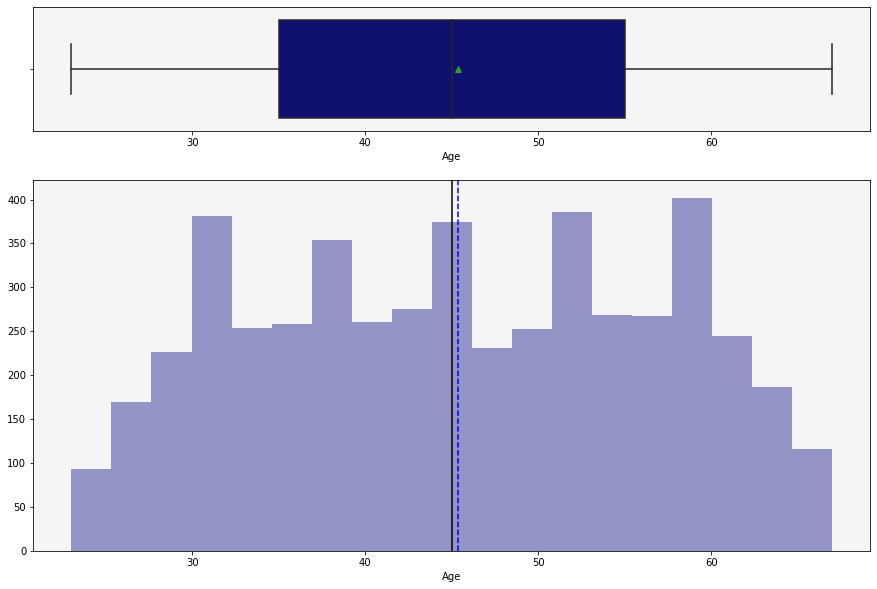

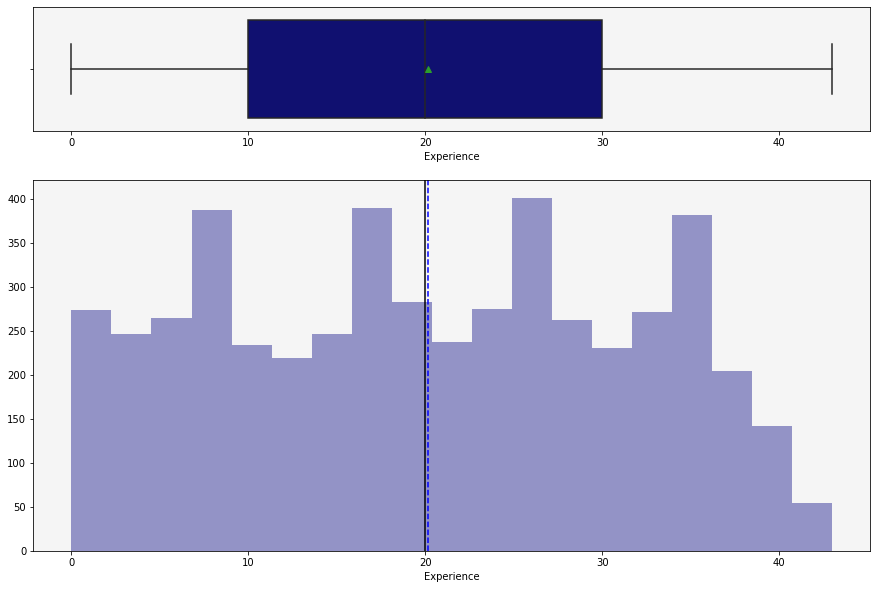

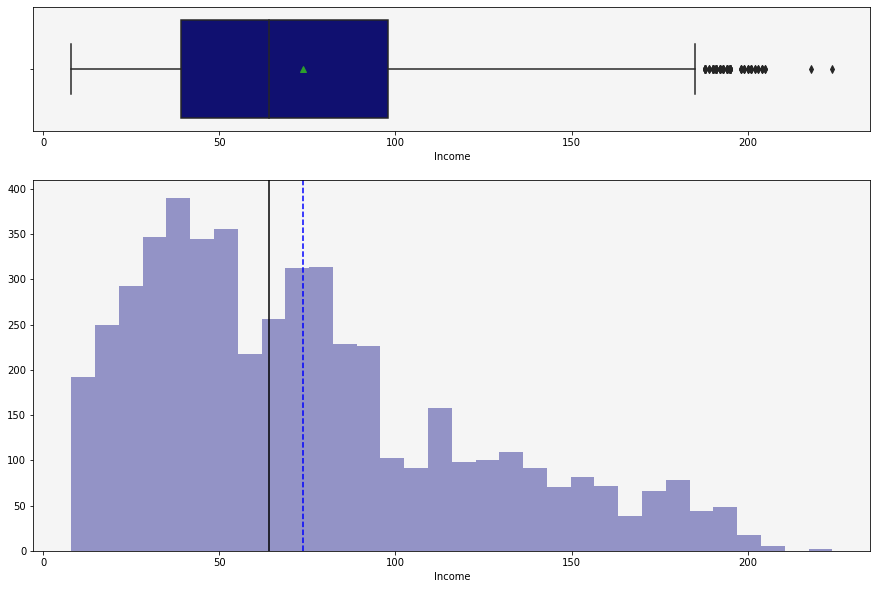

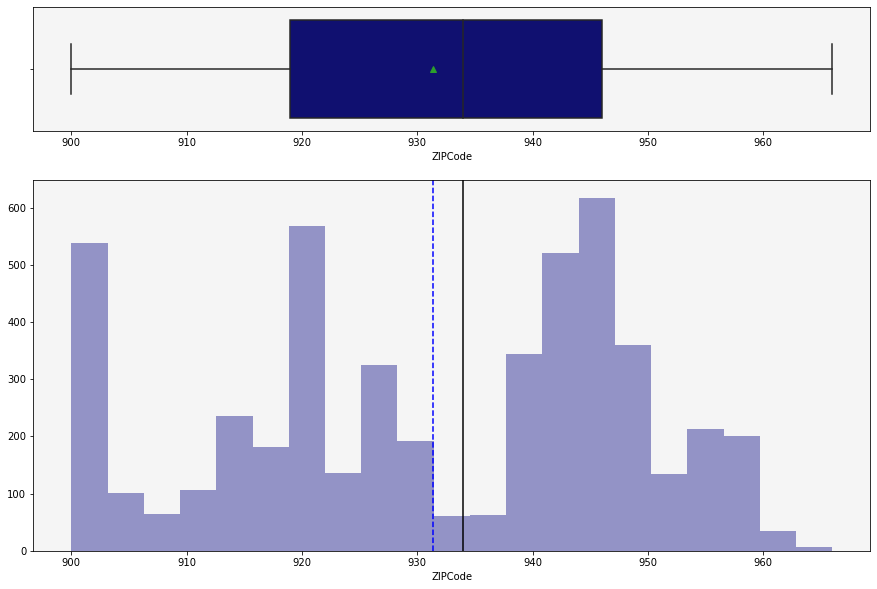

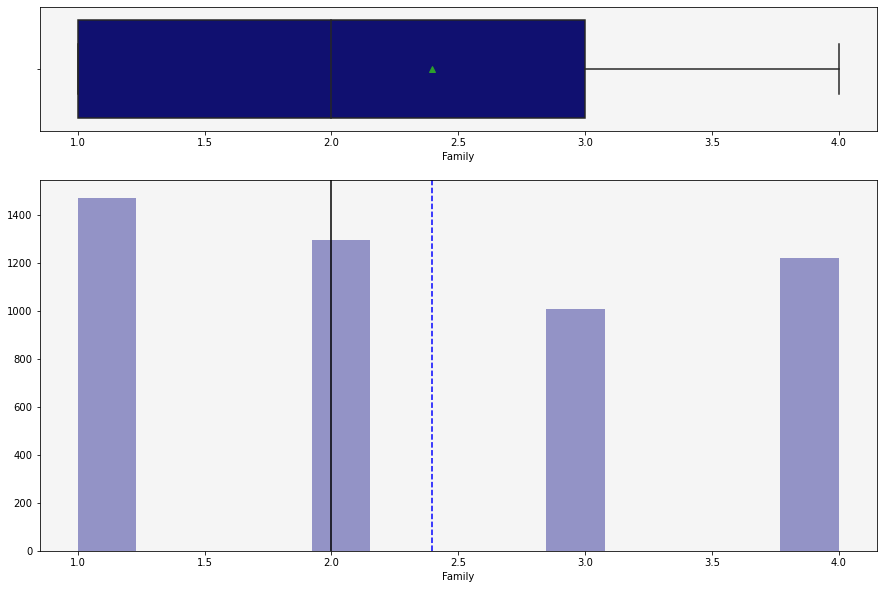

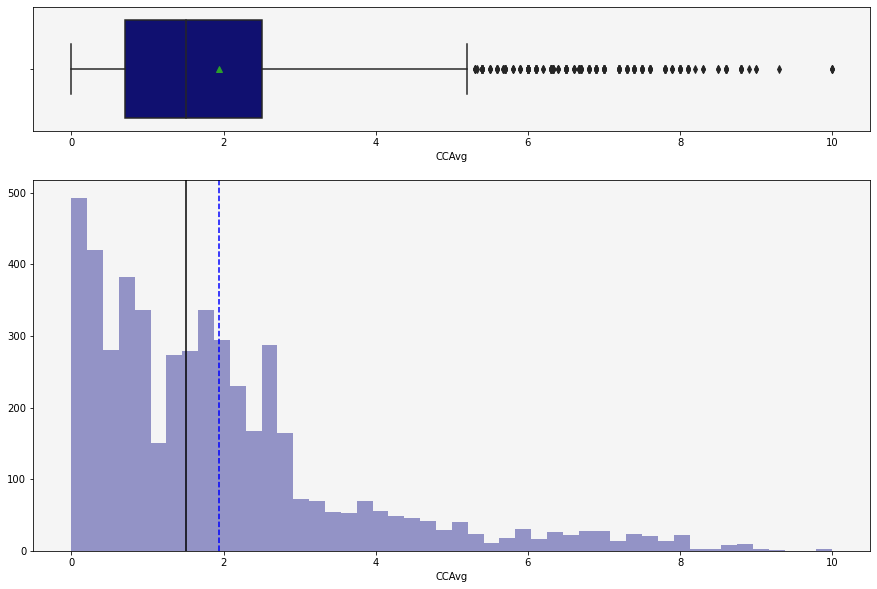

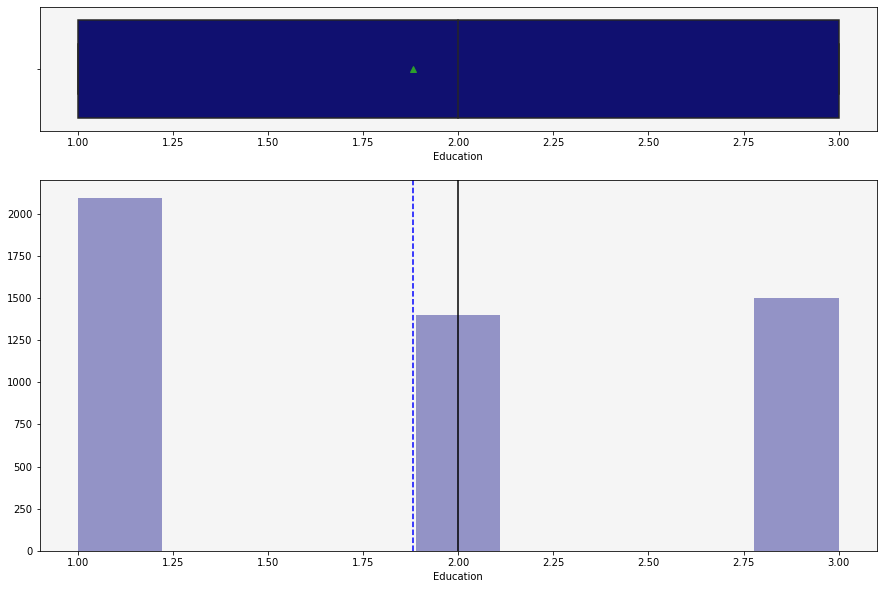

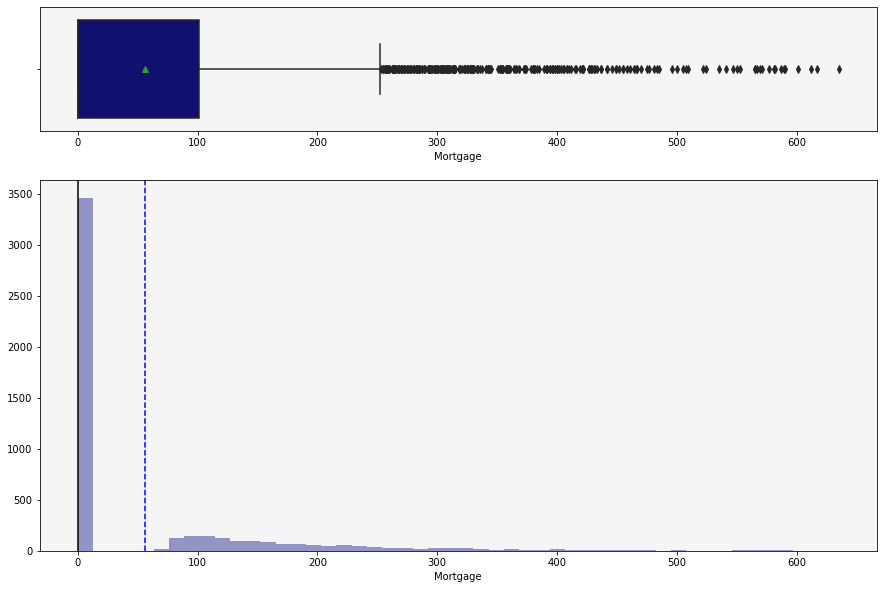

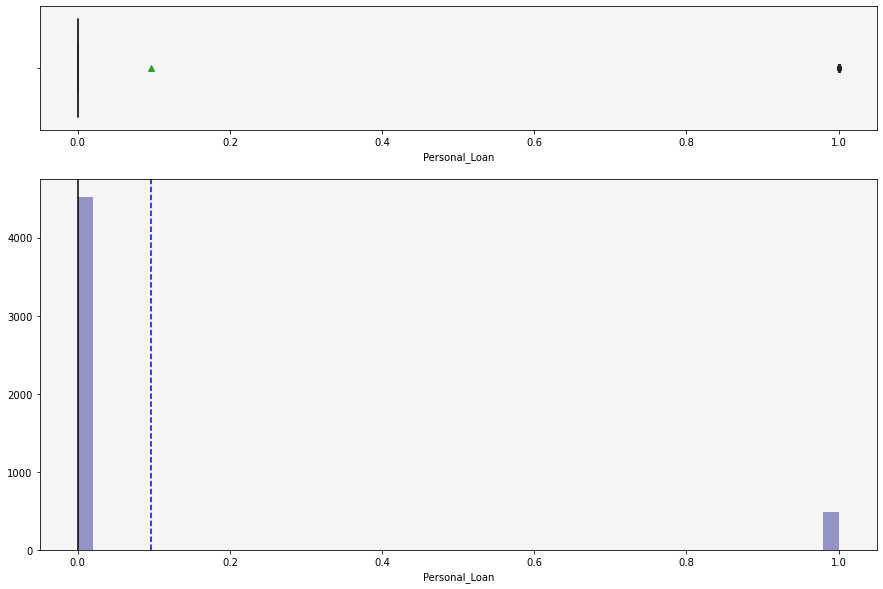

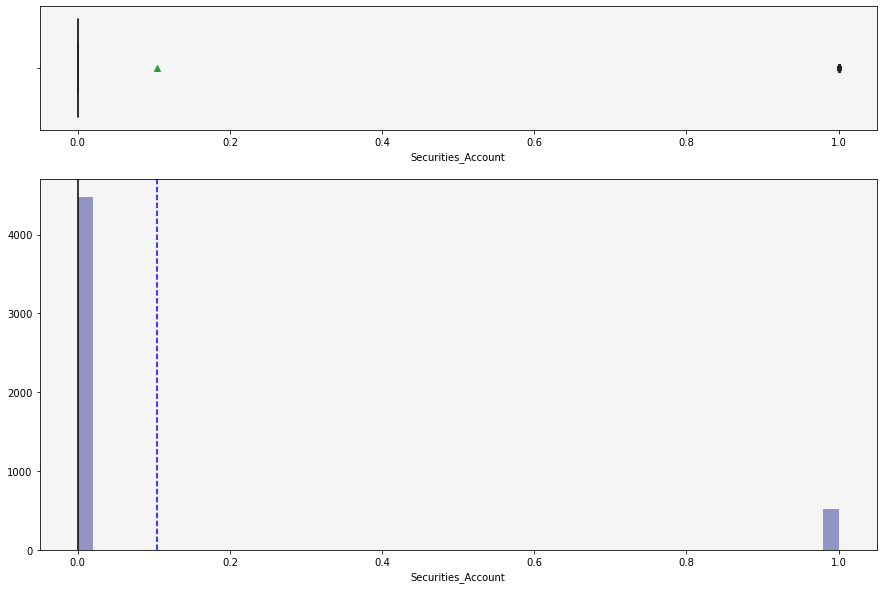

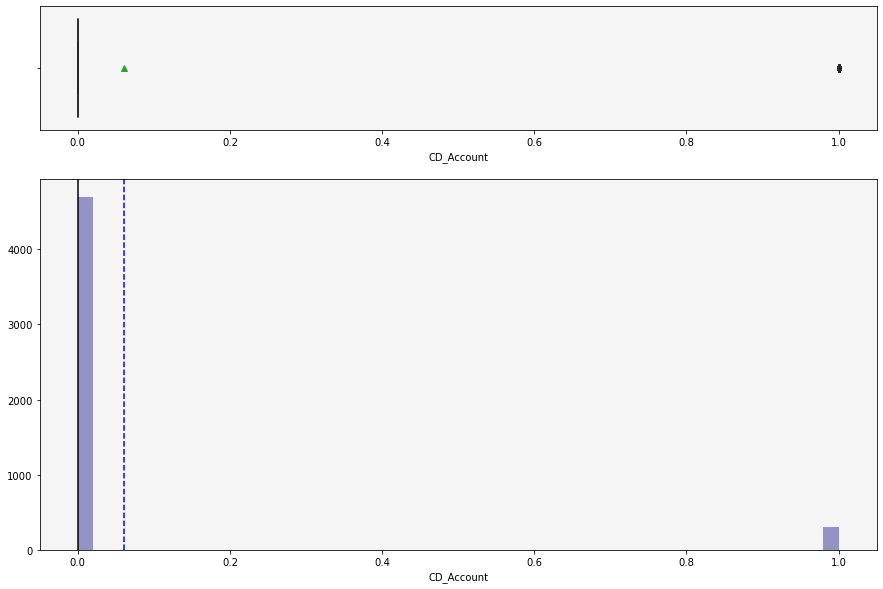

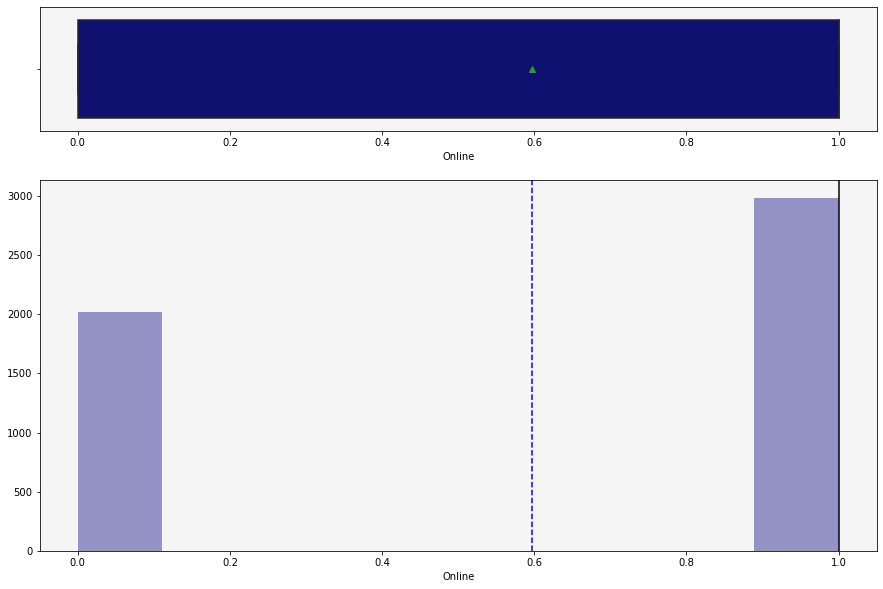

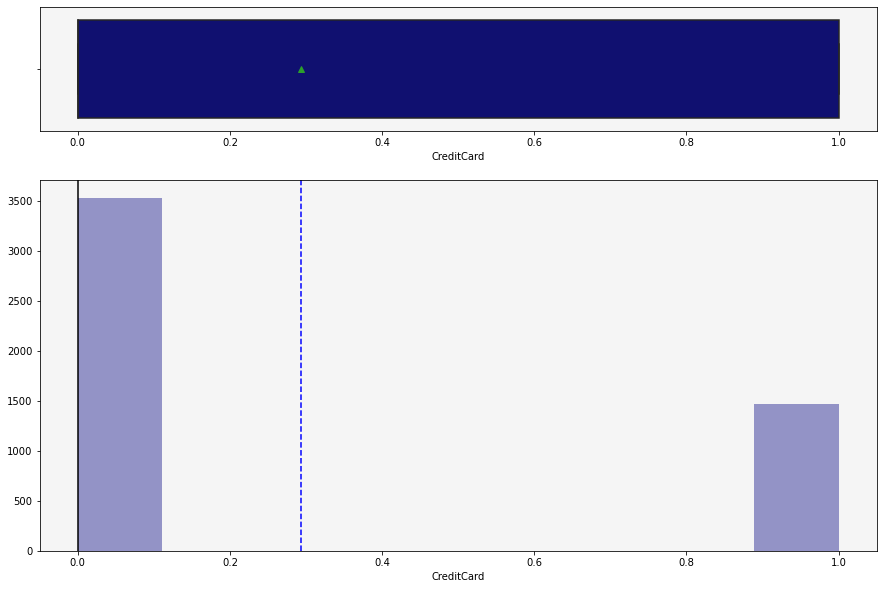

In [25]:
# running a loop through the columns list and plotting the boxplot/distplots 
for each in df.columns:
    plt.show()
    histogram_boxplot(df[each]) # for each column, run the histogram_boxplot function 

# Observations:
* Age is balanced with median/mean both around 45 - from early 20's to late 60's

* Experience is balance with a range between 0 - mid 40's 

* Income is right skewed with outliers above 200k 

* Credit Card usage is right skewed with outlier above 8k but standard range ~ 1,750/month

* Mortgage is right skewed with mean less than 100k, but outliers ranging above 600k

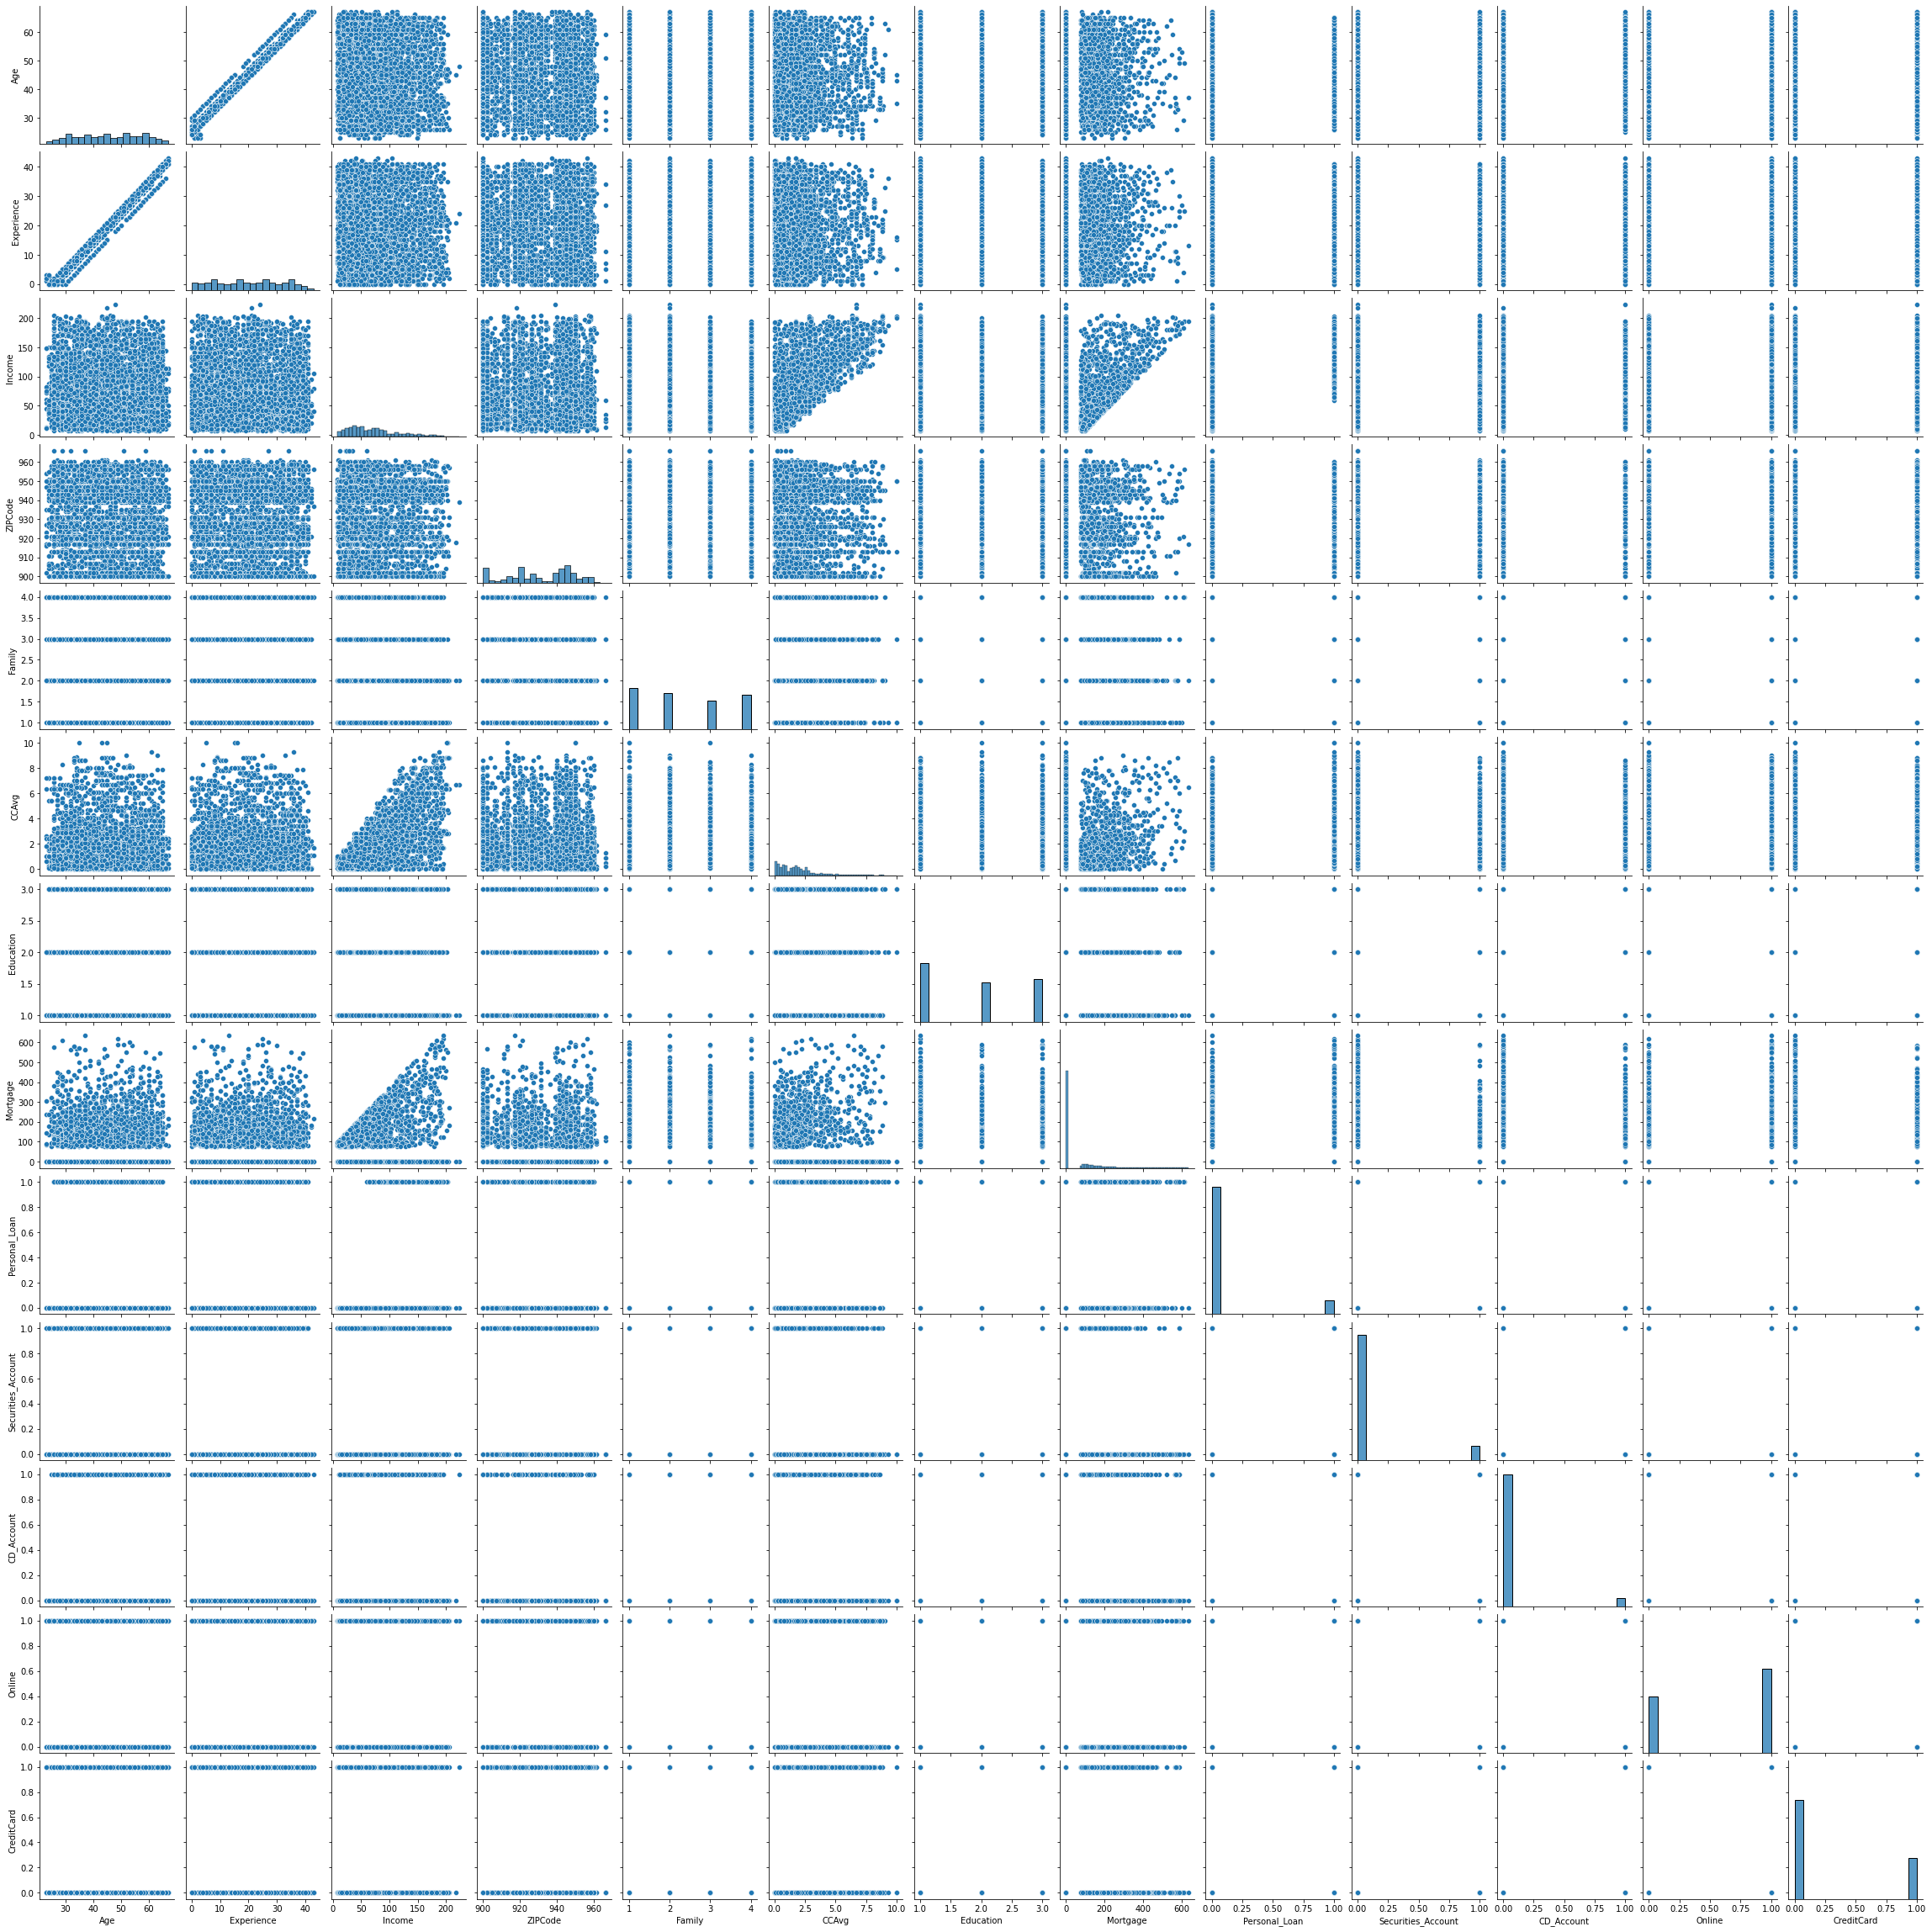

In [26]:
sns.pairplot(df)

# Observation: 
* Highly Linear relationship: Experience vs Age (intuitive)
* Linear relationship: Income and CCAvg
* Not much other insight from the pairplot - More insight will come from the bivariate analysis 


In [27]:
# Binning the Age Group 
age_bins = [0,30,40,50,100]
age_labels = ['Under 30', '30 - 40', '40 - 50', 'Over 50']

In [28]:
# Adding a new Column 'age_range' with the binned values
df['age_range'] = pd.cut(df['Age'],age_bins, labels = age_labels)
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49      911       4    1.6          1         0   
2    45          19      34      900       3    1.5          1         0   
3    39          15      11      947       1    1.0          1         0   
4    35           9     100      941       1    2.7          2         0   
5    35           8      45      913       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                      
1               0                   1           0       0           0   
2               0                   1           0       0           0   
3               0                   0           0       0           0   
4               0                   0           0       0           0   
5               0                   0           0       0           1   

   age_range  
ID            
1   Under 30  
2    40 - 50  
3    30 - 40  
4    30 - 40  
5    30 - 40

In [29]:
# Binning the Experience Column
exp_bins = [0, 10, 20, 30, 40]
exp_labels = ['Under 10', '10 - 20', '20 - 30', 'Over 30']

In [30]:
# Adding the new column with the binned Experience Ranges
df['exp_range'] = pd.cut(df['Experience'],exp_bins, labels = exp_labels)
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49      911       4    1.6          1         0   
2    45          19      34      900       3    1.5          1         0   
3    39          15      11      947       1    1.0          1         0   
4    35           9     100      941       1    2.7          2         0   
5    35           8      45      913       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                      
1               0                   1           0       0           0   
2               0                   1           0       0           0   
3               0                   0           0       0           0   
4               0                   0           0       0           0   
5               0                   0           0       0           1   

   age_range exp_range  
ID                      
1   Under 30  Under 10  
2    40 - 50   10 - 20  
3    30 - 40   10 - 20  
4    30 - 40  Under 10  
5    30 - 40  Under 10

In [31]:
# Binning the Income Group
income_bins = [0, 50, 100, 150, 200, 300]
income_labels = ['Under 50', '50-100', '100-150', '150-200','200+']

In [32]:
# Creating the Binned Income-Range Column
df['income_range'] = pd.cut(df['Income'],income_bins, labels = income_labels)
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49      911       4    1.6          1         0   
2    45          19      34      900       3    1.5          1         0   
3    39          15      11      947       1    1.0          1         0   
4    35           9     100      941       1    2.7          2         0   
5    35           8      45      913       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                      
1               0                   1           0       0           0   
2               0                   1           0       0           0   
3               0                   0           0       0           0   
4               0                   0           0       0           0   
5               0                   0           0       0           1   

   age_range exp_range income_range  
ID                                   
1   Under 30  Under 10     Under 50  
2    40 - 50   10 - 20     Under 50  
3    30 - 40   10 - 20     Under 50  
4    30 - 40  Under 10       50-100  
5    30 - 40  Under 10     Under 50

<AxesSubplot:xlabel='age_range', ylabel='count'>

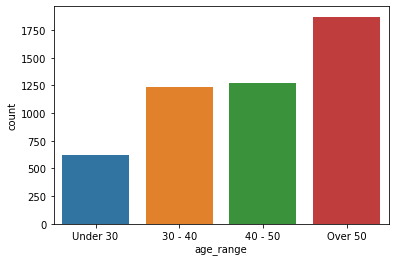

In [33]:
# Checking the Countplot of the Binned Age Ranges
sns.countplot(df['age_range'])

# Observations:
* Surprising look at the Binned Age Group w/ Over 50 being the leading category 
* Though - 30 - 50 combined would be the largest segment if we had done it that way

<AxesSubplot:xlabel='exp_range', ylabel='count'>

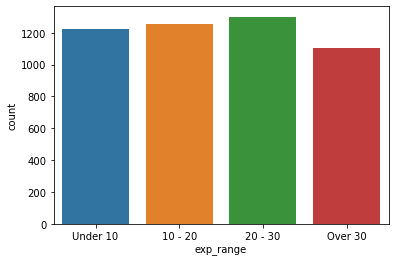

In [34]:
# looking at the spread of Experience range
sns.countplot(df['exp_range'])

# Observation:
* Fairly even distribution in the bucket ranges of experience 
* Over 30 is the least represented, and 20-30 is the most
* Under 10 vs 10-20 is about even

<AxesSubplot:xlabel='income_range', ylabel='count'>

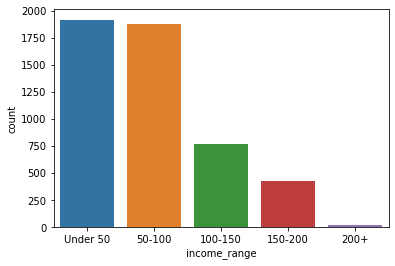

In [35]:
# looking at the income spread using the Buckets
sns.countplot(df['income_range'])

# Observation:
* under 50 and 50-100 are the top two categories in terms of count 

# NOTE: 
* We might have to also add bin categories: CCAvg, Mortgage, but will move on for now 

BIVARIATE ANALYSIS

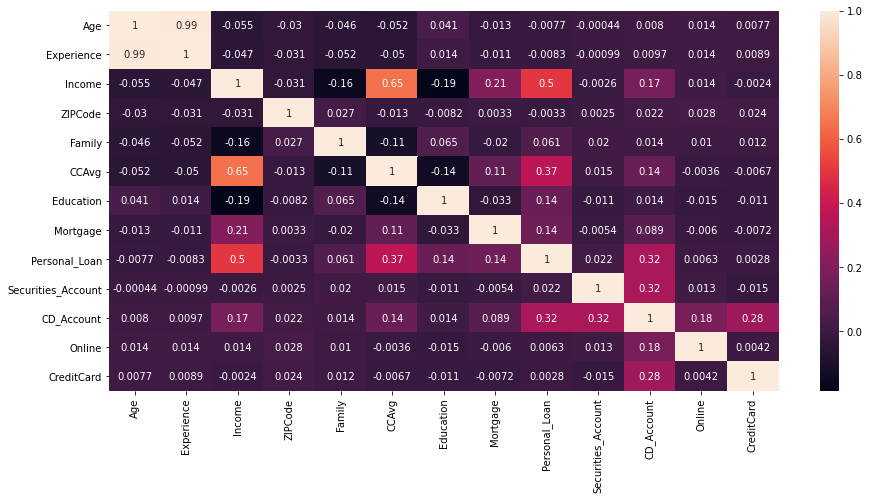

In [36]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observation from Heatmap: 

* Age vs Experience - highly correlated (i.e. older people will naturally have more experience)
*CCAvg vs Income - strong correlation (i.e. people with higher income tend to spend more on consumer goods, credit card)
*Personal_Loan vs Income - Medium correlation 

In [37]:
df.head()

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49      911       4    1.6          1         0   
2    45          19      34      900       3    1.5          1         0   
3    39          15      11      947       1    1.0          1         0   
4    35           9     100      941       1    2.7          2         0   
5    35           8      45      913       4    1.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
ID                                                                      
1               0                   1           0       0           0   
2               0                   1           0       0           0   
3               0                   0           0       0           0   
4               0                   0           0       0           0   
5               0                   0           0       0           1   

   age_range exp_range income_range  
ID                                   
1   Under 30  Under 10     Under 50  
2    40 - 50   10 - 20     Under 50  
3    30 - 40   10 - 20     Under 50  
4    30 - 40  Under 10       50-100  
5    30 - 40  Under 10     Under 50

In [38]:
bucket_list = df.columns[-3:]
bucket_list

Index(['age_range', 'exp_range', 'income_range'], dtype='object')

In [39]:
# had error with last three category columns, so index them out
non_bucket_list = df.columns[:-3]

<AxesSubplot:xlabel='age_range', ylabel='Experience'>

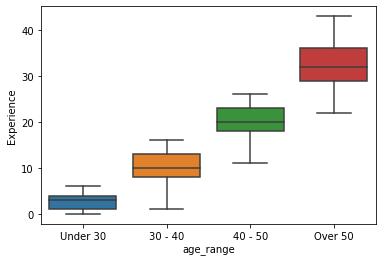

In [40]:
sns.boxplot(df['age_range'],df['Experience'])

Observation:
* 

<AxesSubplot:xlabel='income_range', ylabel='CCAvg'>

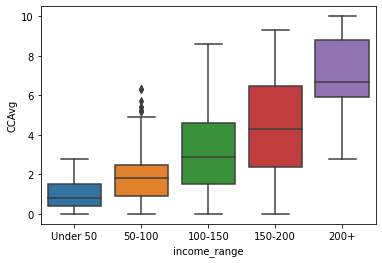

In [41]:
# 
sns.boxplot(y = df['CCAvg'],x = df['income_range'])

Strong Positive Correlation with Credit Card Spending and Income Range

<AxesSubplot:xlabel='income_range', ylabel='Personal_Loan'>

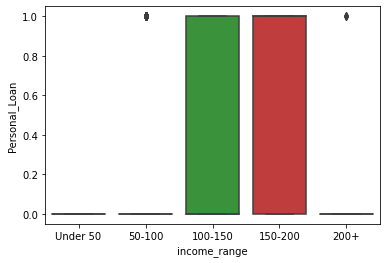

In [42]:
sns.boxplot(y = df['Personal_Loan'],x = df['income_range'])

Almost all of Personal Loans are associated with 100-200 income range 

When compared to the Inome Range Count Plot - sns.countplot(df['income_range']) - There is a huge under-tapped section of between under-50 and up to 100k Income Range that needs to be addressed in future campaigns. 

# Observations:
* 

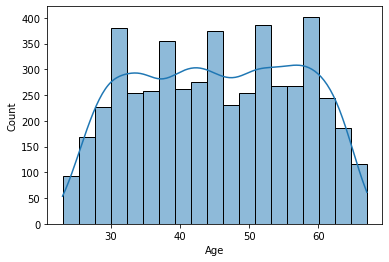

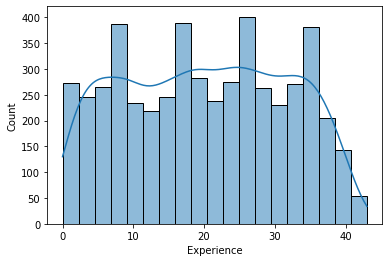

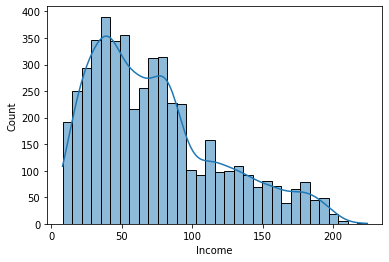

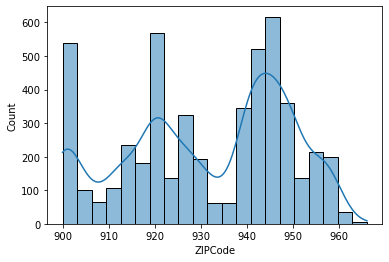

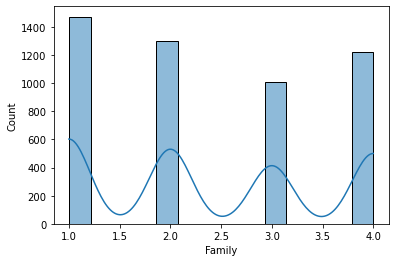

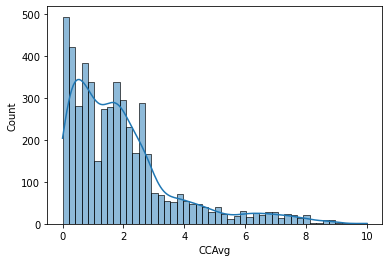

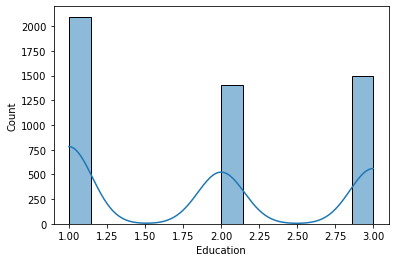

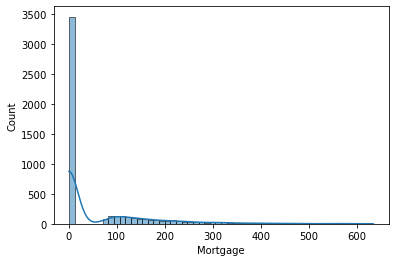

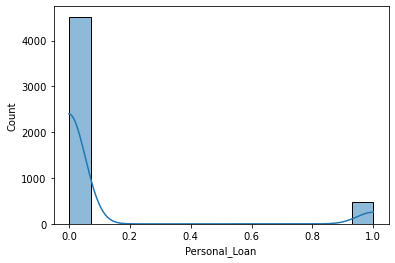

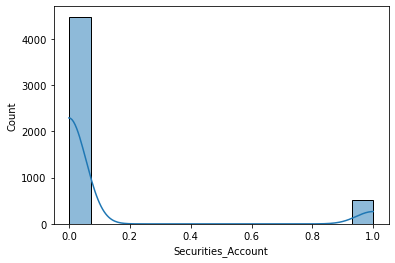

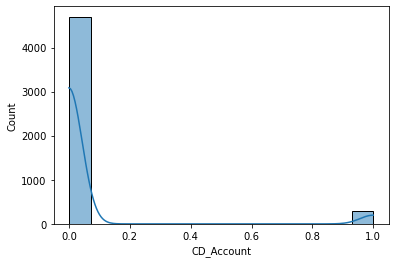

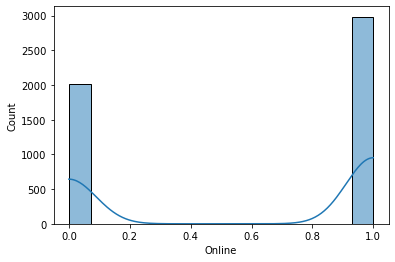

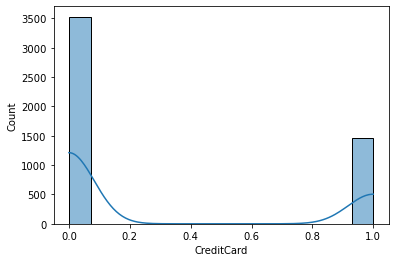

In [43]:
# Running a loop for each Column and getting a corresponding histogram.. 
# we did this earlier but this will allow to pull individual histogram for presentation if needed
# Univariate Analysis
for ea in non_bucket_list: # had error with last three category columns, so index them out
    plt.figure() #Note, this is to make a new plot each loop (otherwise, all data would show on one plot)
    sns.histplot(df[ea],kde=True)

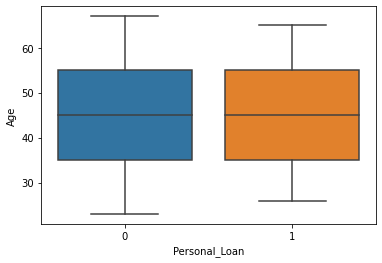

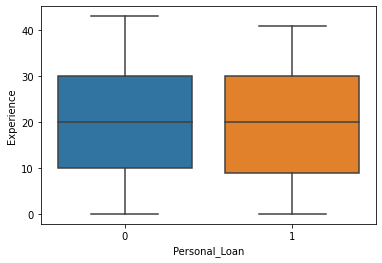

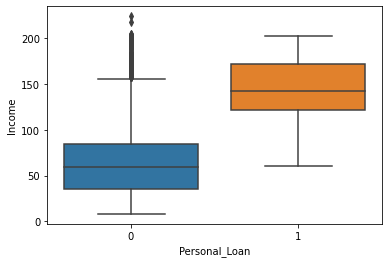

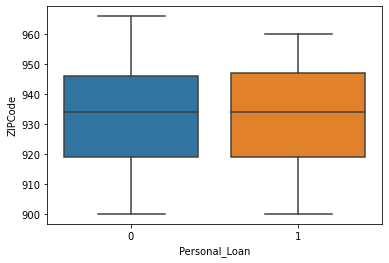

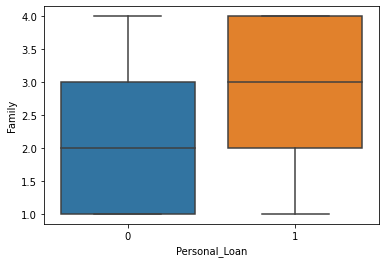

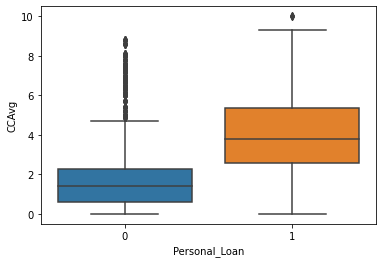

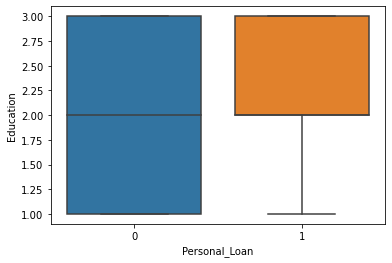

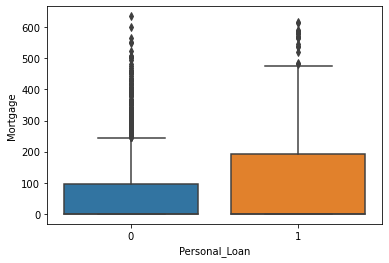

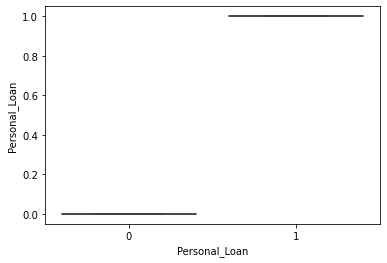

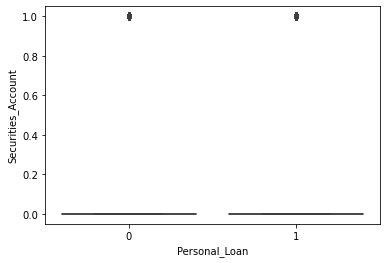

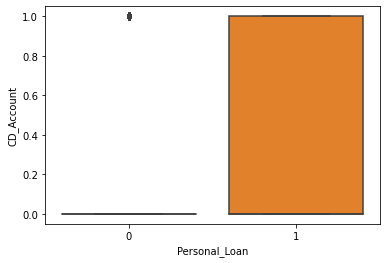

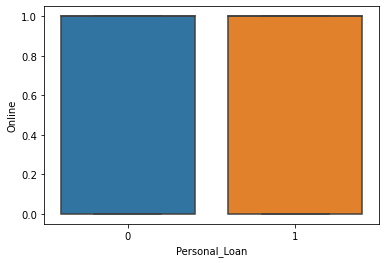

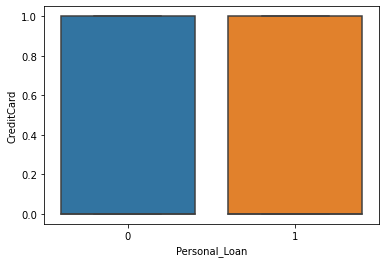

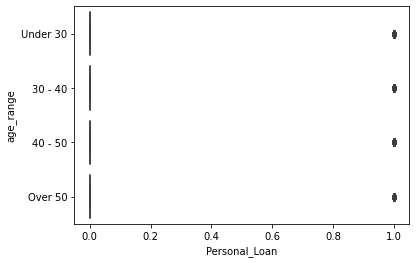

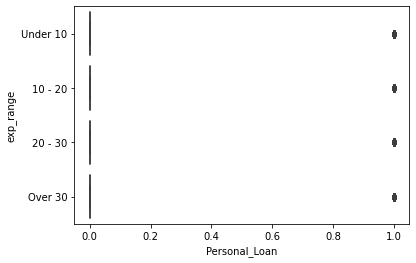

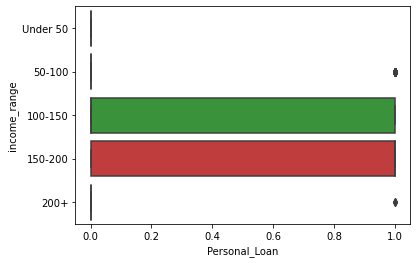

In [44]:
for ea in df.columns:
    plt.figure()
    sns.boxplot(df['Personal_Loan'], df[ea])

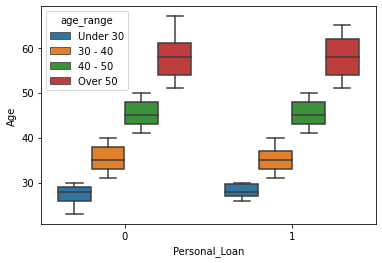

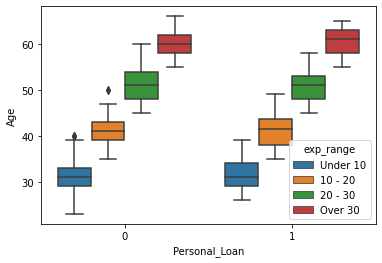

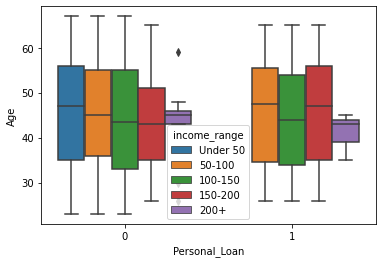

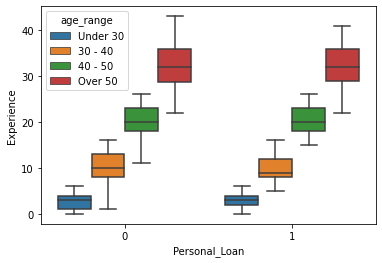

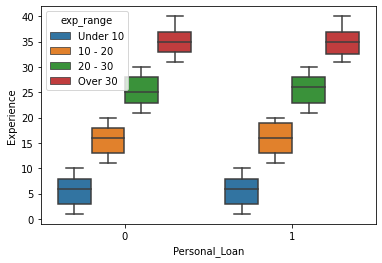

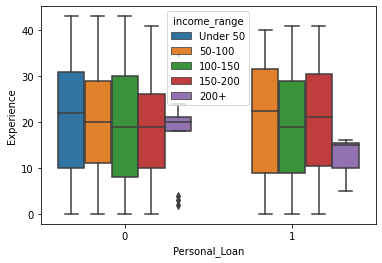

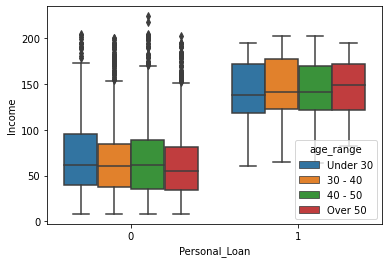

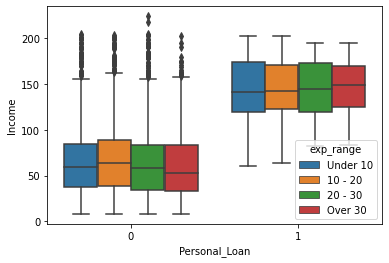

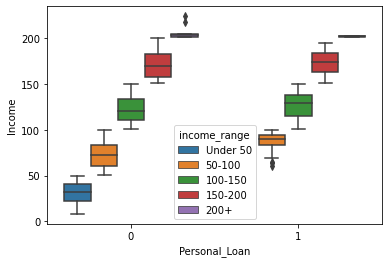

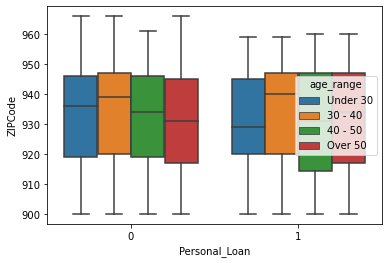

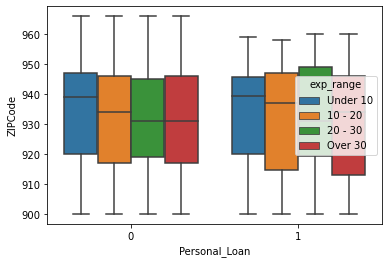

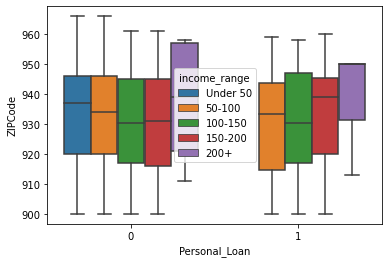

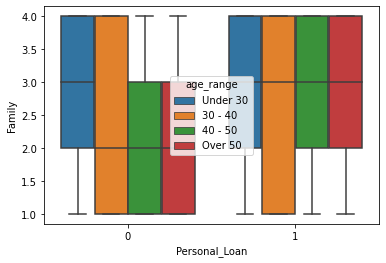

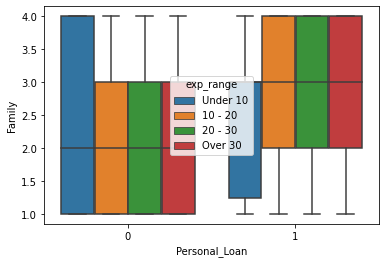

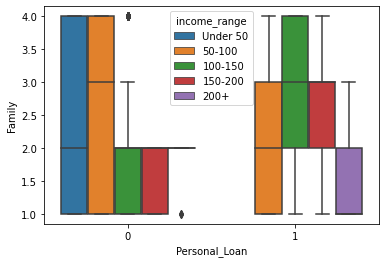

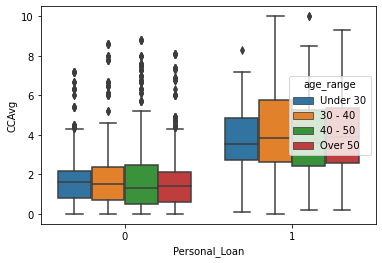

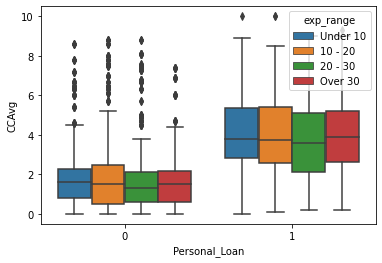

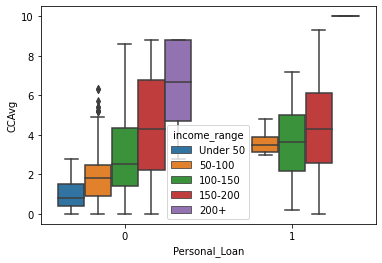

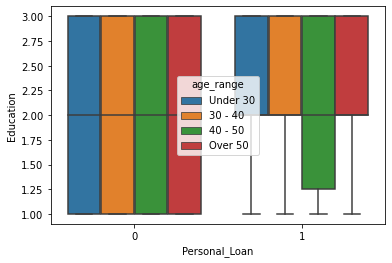

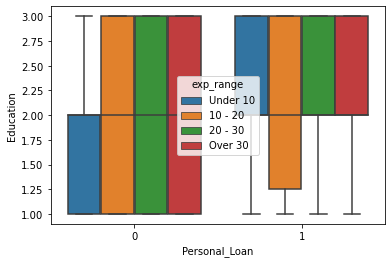

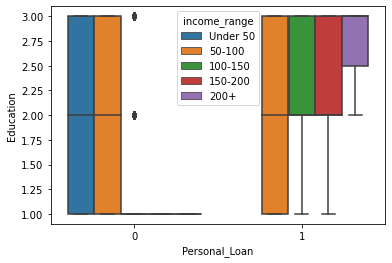

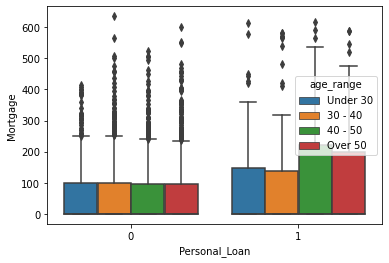

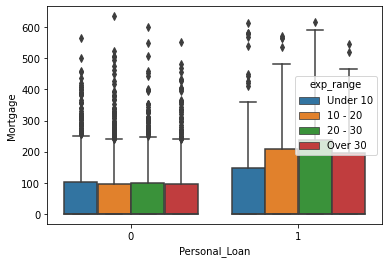

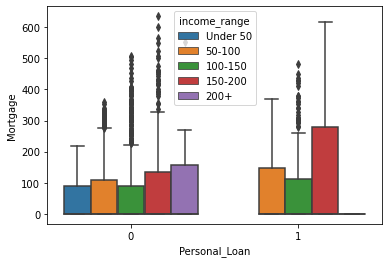

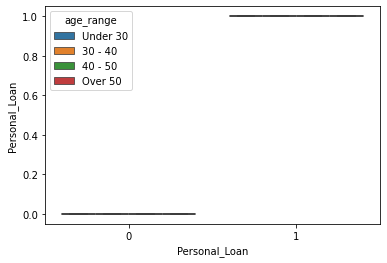

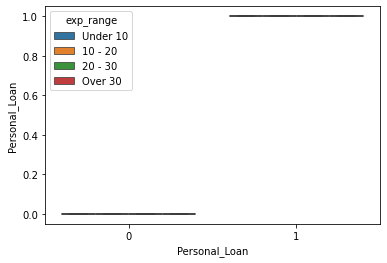

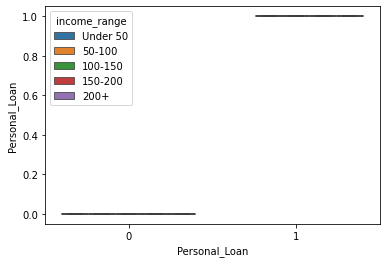

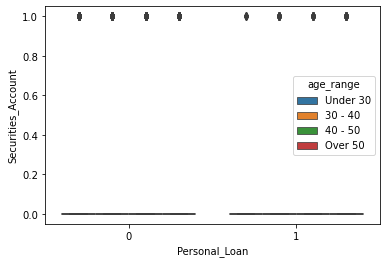

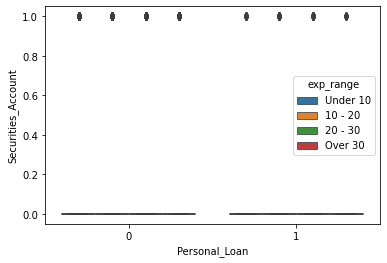

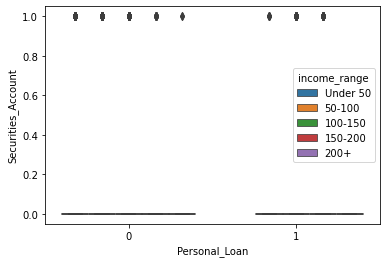

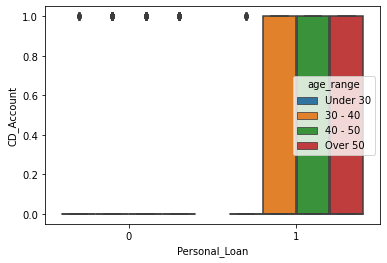

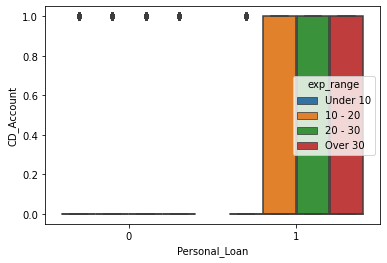

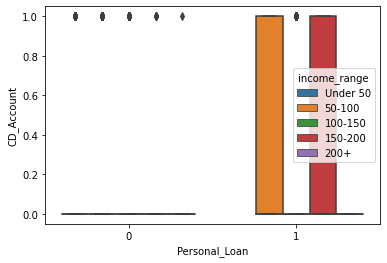

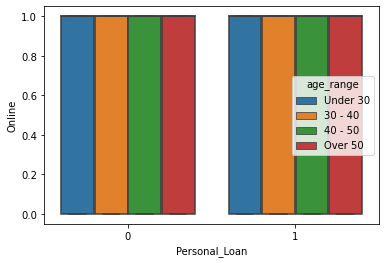

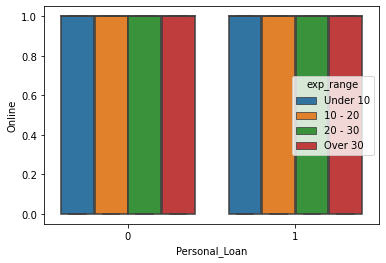

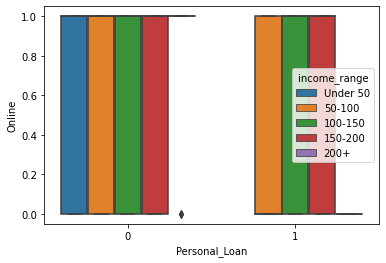

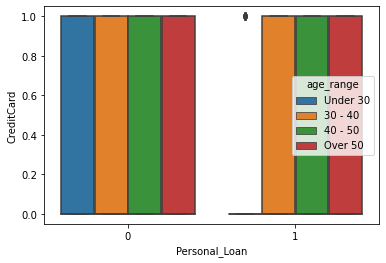

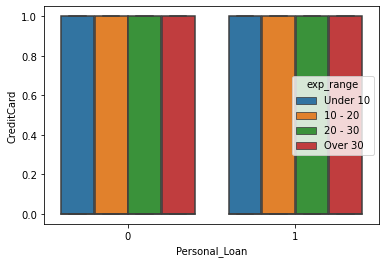

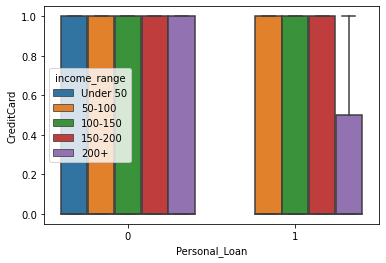

In [45]:
# Run through every combination of varibles with Personal_Loan (yes or no) locked on the x-axis
for each in non_bucket_list:
    for ea in bucket_list: # run through each bucket-column and use it as the hue
        plt.figure()
        sns.boxplot(x = df['Personal_Loan'],y = df[each], hue=df[ea])

# Observations: 
* Customers taking loans have more income than people not taking loans - independent of age
* Customers taking loans have more credit card average
* Customers with income between 100-150k have more.. people with over 200k have basically no loans, and less than 50k is low
* Customers taking loans have higher mortgage values (i.e. higher debt)

* We are looking for high income with high debt levels for top customer prospects

Obersvations from boxplots, Person Loan customers tend to: 

* have higher income levels, 100-200k, (counter-intuitive - unless people who take personal loans DON'T 'Live within their means') 
* have larger families (makes sense intuitively; they need more cash)
* have higer credit card spending (CCAvg) - makes sense
* have at least 2 years of education
* have higher mortgages


# Run some Visualizations for only the 480 customers who took personal loans

In [46]:
yes_loans = df.loc[df["Personal_Loan"] == 1]
yes_loans.describe()

Age  Experience      Income     ZIPCode      Family       CCAvg  \
count  480.000000  480.000000  480.000000  480.000000  480.000000  480.000000   
mean    45.066667   19.843750  144.745833  931.185417    2.612500    3.905354   
std     11.590964   11.582443   31.584429   17.663788    1.115393    2.097681   
min     26.000000    0.000000   60.000000  900.000000    1.000000    0.000000   
25%     35.000000    9.000000  122.000000  919.000000    2.000000    2.600000   
50%     45.000000   20.000000  142.500000  934.000000    3.000000    3.800000   
75%     55.000000   30.000000  172.000000  947.000000    4.000000    5.347500   
max     65.000000   41.000000  203.000000  960.000000    4.000000   10.000000   

        Education    Mortgage  Personal_Loan  Securities_Account  CD_Account  \
count  480.000000  480.000000          480.0          480.000000  480.000000   
mean     2.233333  100.845833            1.0            0.125000    0.291667   
std      0.753373  160.847862            0.0            0.331064    0.455004   
min      1.000000    0.000000            1.0            0.000000    0.000000   
25%      2.000000    0.000000            1.0            0.000000    0.000000   
50%      2.000000    0.000000            1.0            0.000000    0.000000   
75%      3.000000  192.500000            1.0            0.000000    1.000000   
max      3.000000  617.000000            1.0            1.000000    1.000000   

          Online  CreditCard  
count  480.00000  480.000000  
mean     0.60625    0.297917  
std      0.48909    0.457820  
min      0.00000    0.000000  
25%      0.00000    0.000000  
50%      1.00000    0.000000  
75%      1.00000    1.000000  
max      1.00000    1.000000

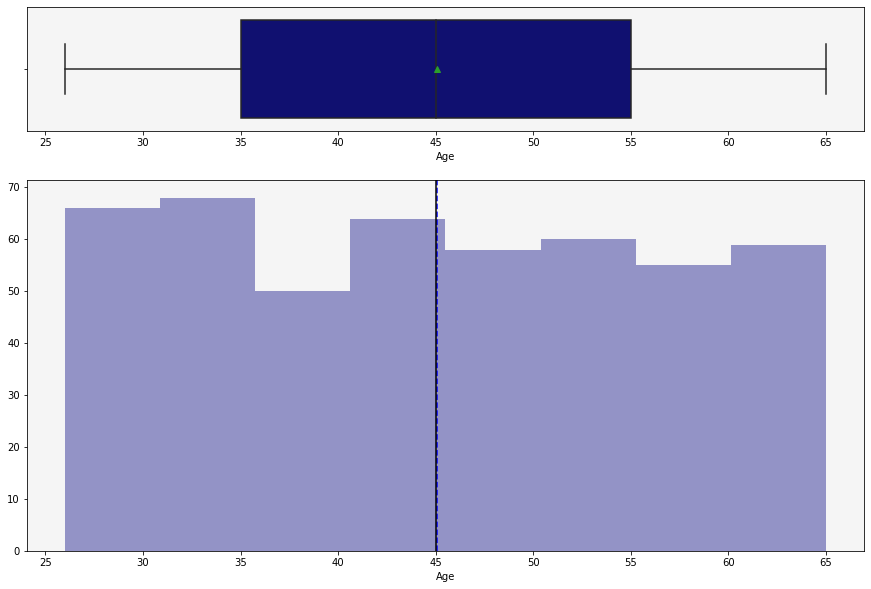

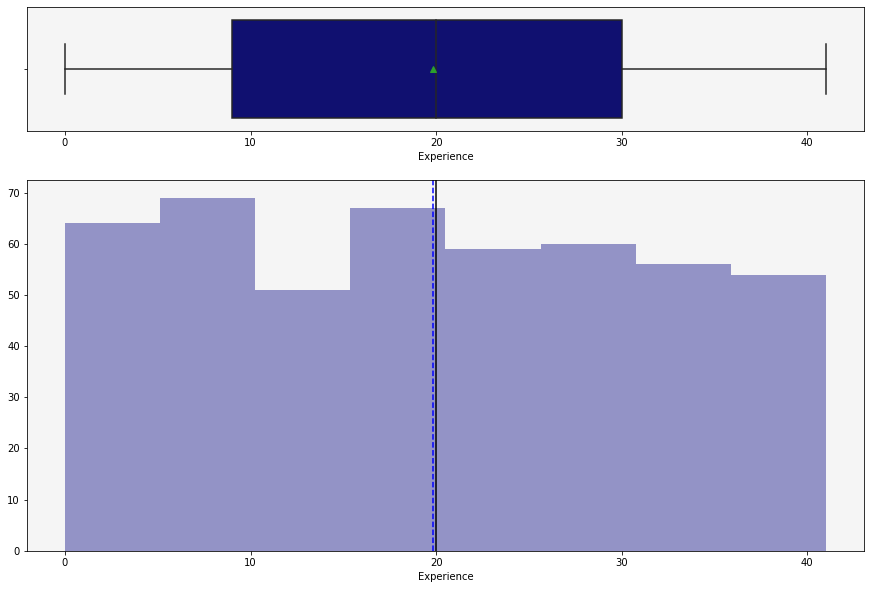

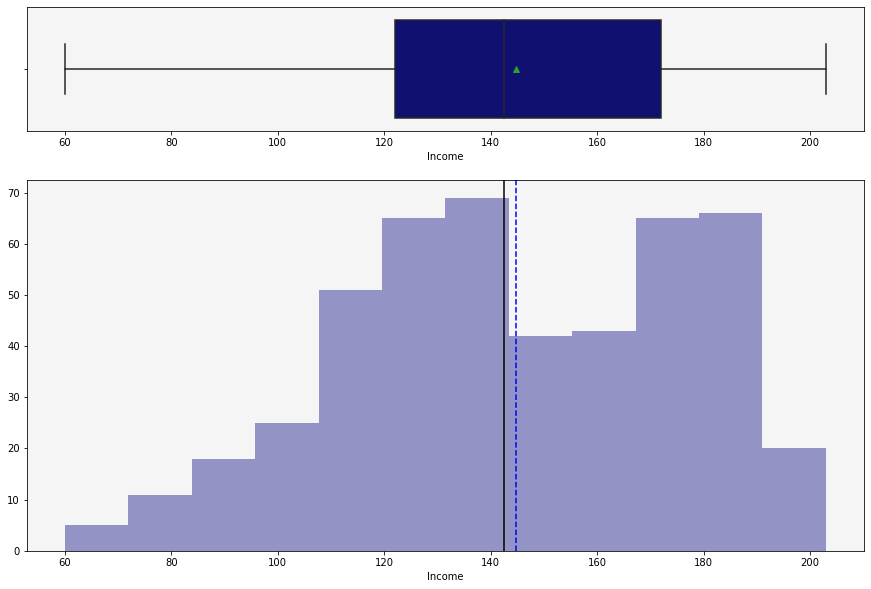

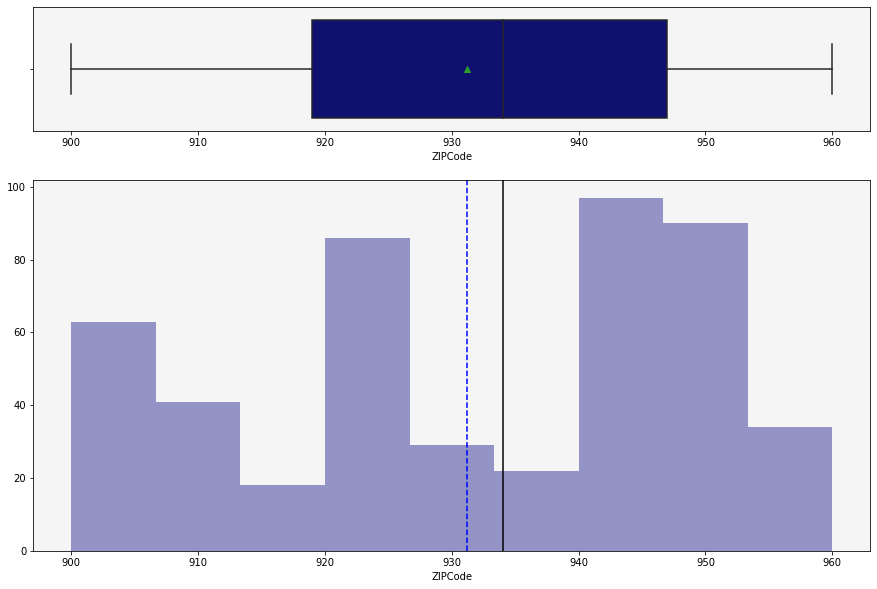

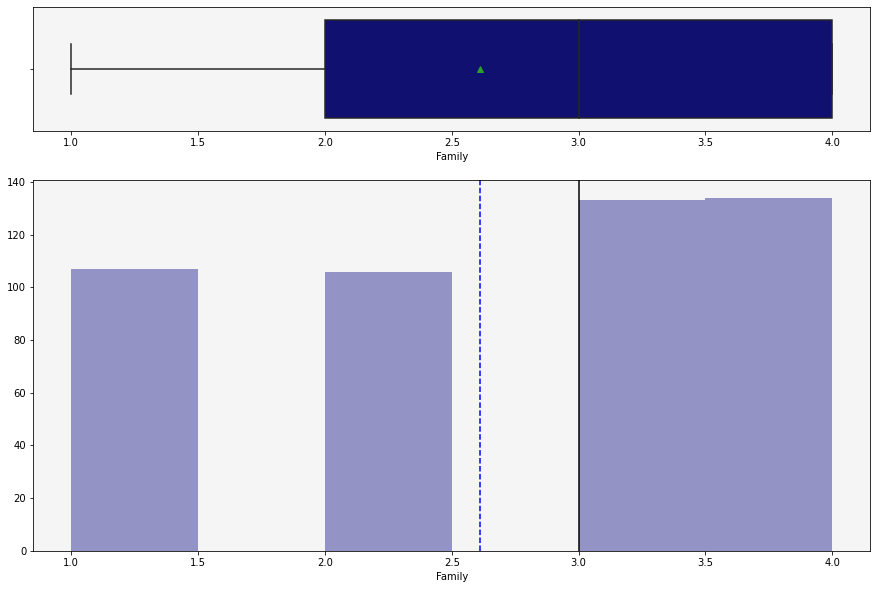

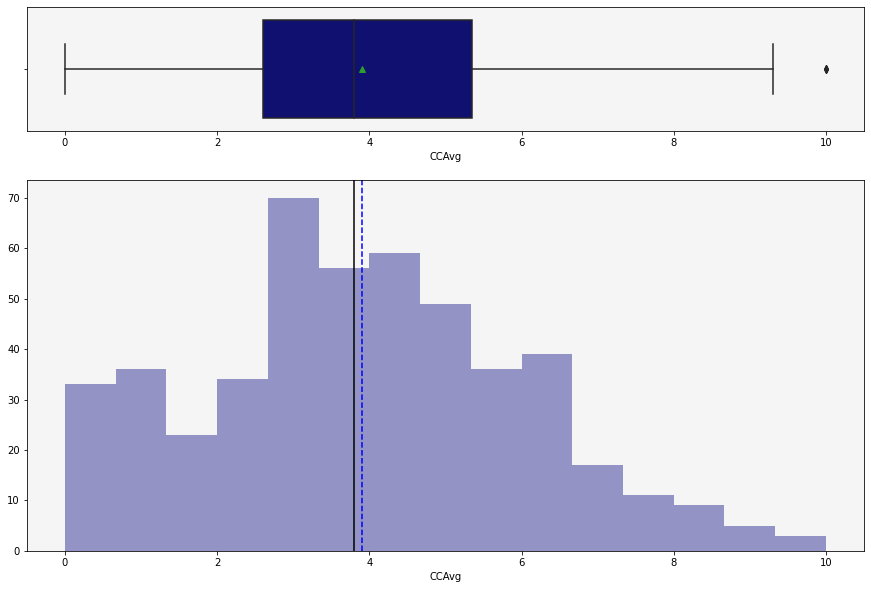

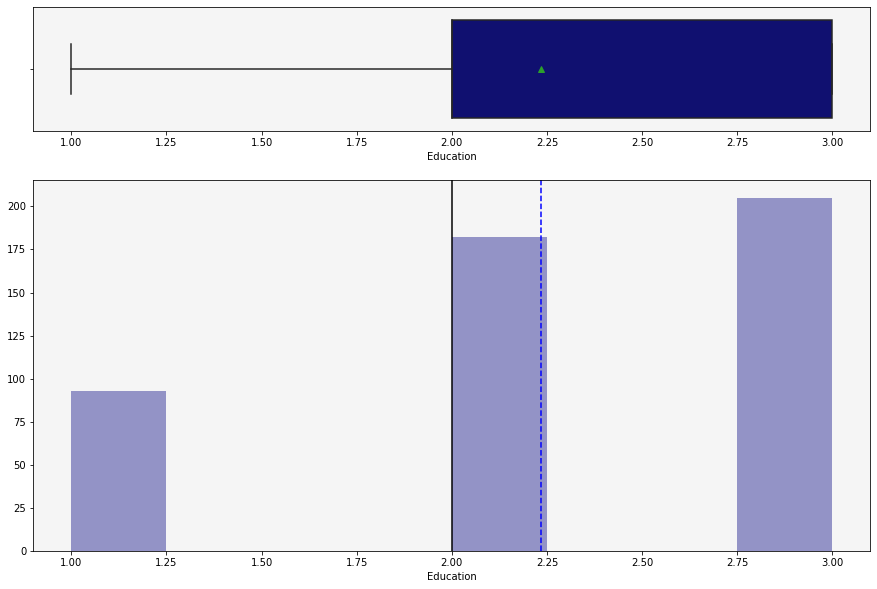

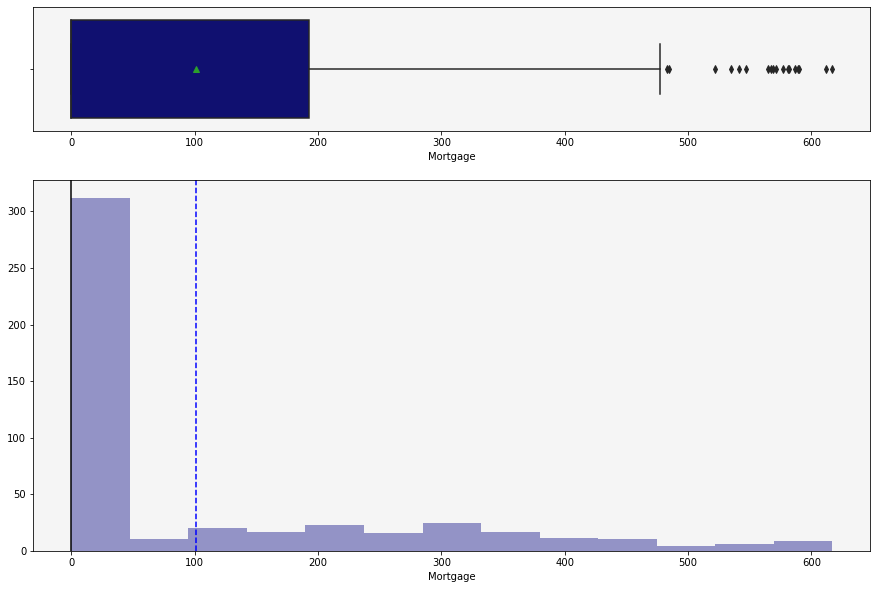

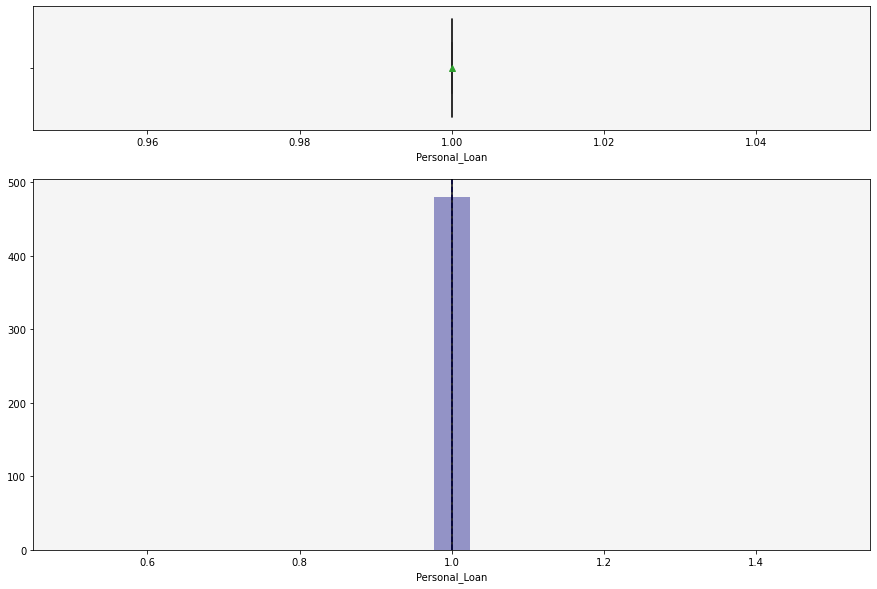

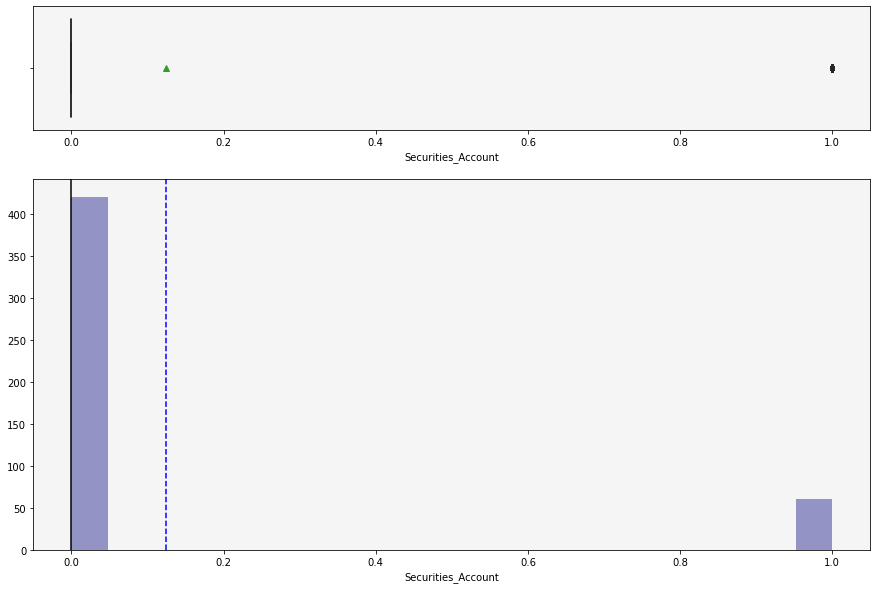

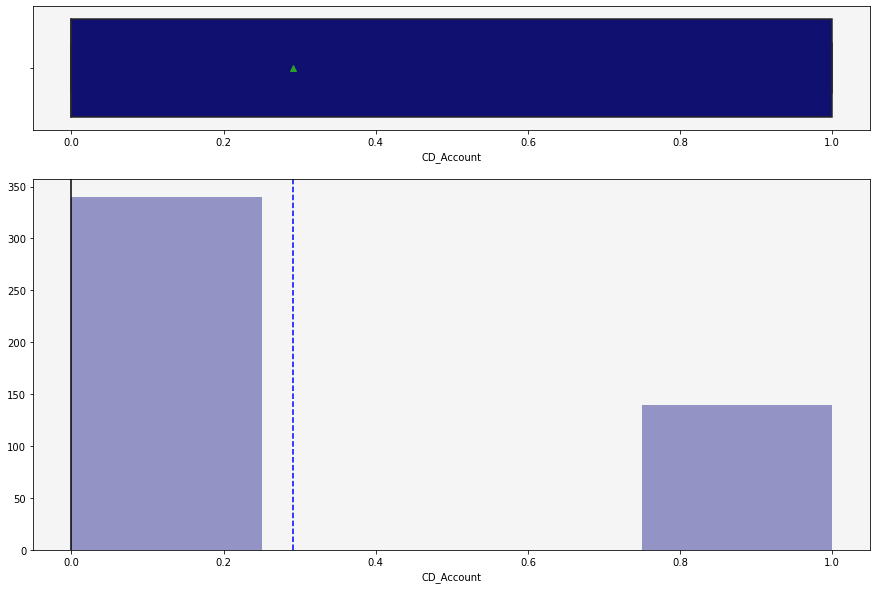

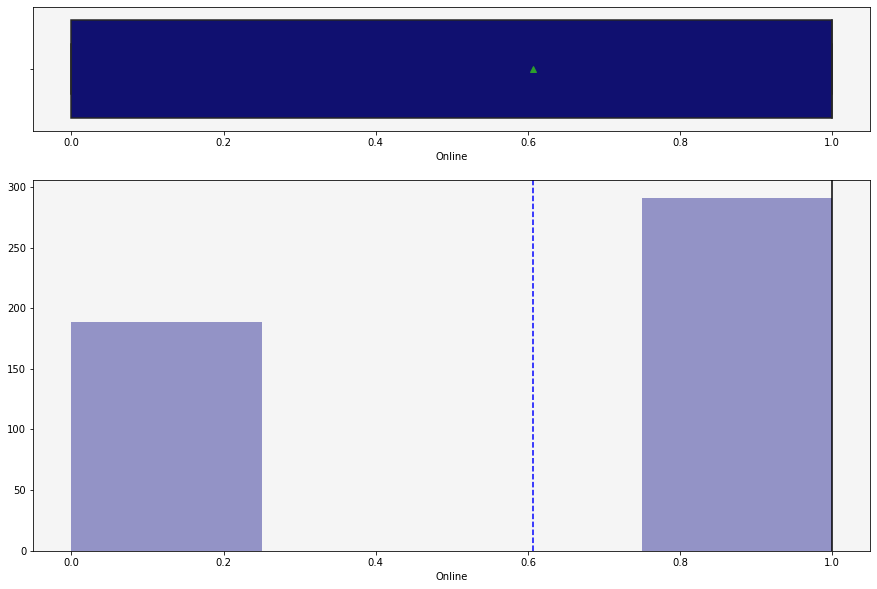

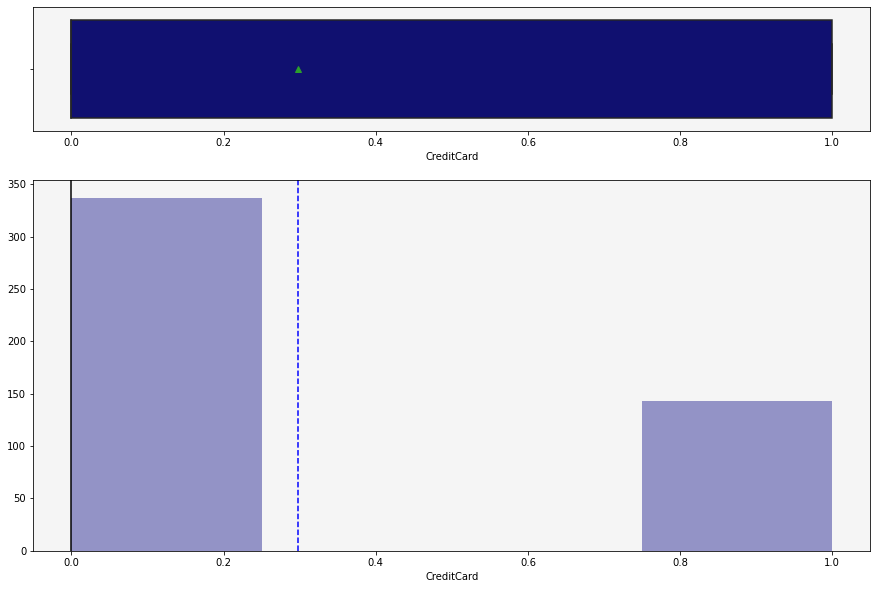

TypeError: Horizontal orientation requires numeric `x` variable.

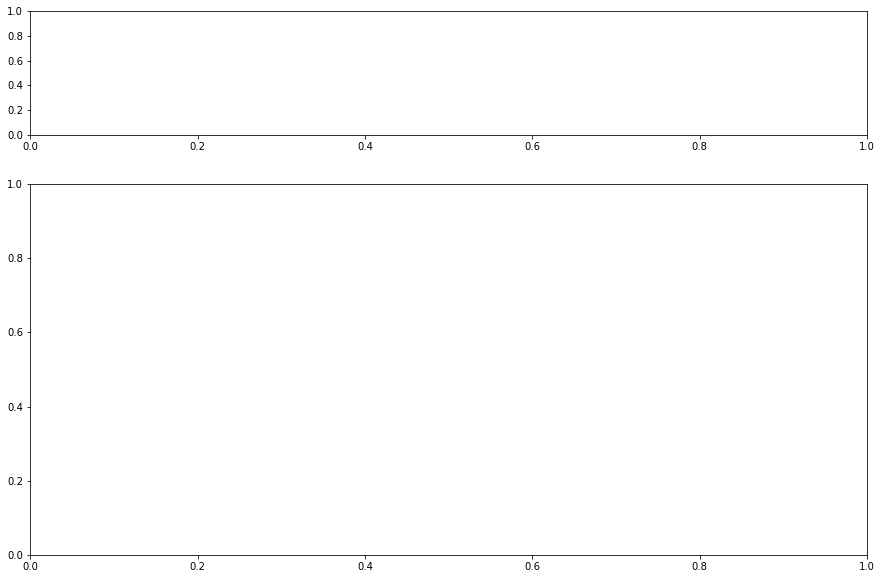

In [47]:
# running a loop through the columns list and plotting the boxplot/distplots 
for each in yes_loans.columns:
    plt.show()
    histogram_boxplot(yes_loans[each]) # for each column, run the histogram_boxplot function 

# Create Dummies

In [48]:
# convert the bucket columns into dummies - 1st: put column names into a list
dummy_columns = ["age_range", "exp_range", "income_range"]

In [49]:
# convert bucket columns to dummies 
df = pd.get_dummies(df, columns = dummy_columns)
df.head(10)

Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25           1      49      911       4    1.6          1         0   
2    45          19      34      900       3    1.5          1         0   
3    39          15      11      947       1    1.0          1         0   
4    35           9     100      941       1    2.7          2         0   
5    35           8      45      913       4    1.0          2         0   
6    37          13      29      921       4    0.4          2       155   
7    53          27      72      917       2    1.5          2         0   
8    50          24      22      939       1    0.3          3         0   
9    35          10      81      900       3    0.6          2       104   
10   34           9     180      930       1    8.9          3         0   

    Personal_Loan  Securities_Account  ...  age_range_Over 50  \
ID                                     ...                      
1               0                   1  ...                  0   
2               0                   1  ...                  0   
3               0                   0  ...                  0   
4               0                   0  ...                  0   
5               0                   0  ...                  0   
6               0                   0  ...                  0   
7               0                   0  ...                  1   
8               0                   0  ...                  0   
9               0                   0  ...                  0   
10              1                   0  ...                  0   

    exp_range_Under 10  exp_range_10 - 20  exp_range_20 - 30  \
ID                                                             
1                    1                  0                  0   
2                    0                  1                  0   
3                    0                  1                  0   
4                    1                  0                  0   
5                    1                  0                  0   
6                    0                  1                  0   
7                    0                  0                  1   
8                    0                  0                  1   
9                    1                  0                  0   
10                   1                  0                  0   

    exp_range_Over 30  income_range_Under 50  income_range_50-100  \
ID                                                                  
1                   0                      1                    0   
2                   0                      1                    0   
3                   0                      1                    0   
4                   0                      0                    1   
5                   0                      1                    0   
6                   0                      1                    0   
7                   0                      0                    1   
8                   0                      1                    0   
9                   0                      0                    1   
10                  0                      0                    0   

    income_range_100-150  income_range_150-200  income_range_200+  
ID                                                                 
1                      0                     0                  0  
2                      0                     0                  0  
3                      0                     0                  0  
4                      0                     0                  0  
5                      0                     0                  0  
6                      0                     0                  0  
7                      0                     0                  0  
8                      0                     0                  0  
9                      0        

In [50]:
# we don't need Age, Experience and Income since we created the dummies
# creating a new variable df in case that we do need to go back to them - if buckets/hot-keys models aren't satsifactory
age_exp_income = ['Age', 'Experience', 'Income']
hot_df = df.drop(age_exp_income, axis=1)

In [51]:
hot_df.head(10)

ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  \
ID                                                               
1       911       4    1.6          1         0              0   
2       900       3    1.5          1         0              0   
3       947       1    1.0          1         0              0   
4       941       1    2.7          2         0              0   
5       913       4    1.0          2         0              0   
6       921       4    0.4          2       155              0   
7       917       2    1.5          2         0              0   
8       939       1    0.3          3         0              0   
9       900       3    0.6          2       104              0   
10      930       1    8.9          3         0              1   

    Securities_Account  CD_Account  Online  CreditCard  ...  \
ID                                                      ...   
1                    1           0       0           0  ...   
2                    1           0       0           0  ...   
3                    0           0       0           0  ...   
4                    0           0       0           0  ...   
5                    0           0       0           1  ...   
6                    0           0       1           0  ...   
7                    0           0       1           0  ...   
8                    0           0       0           1  ...   
9                    0           0       1           0  ...   
10                   0           0       0           0  ...   

    age_range_Over 50  exp_range_Under 10  exp_range_10 - 20  \
ID                                                             
1                   0                   1                  0   
2                   0                   0                  1   
3                   0                   0                  1   
4                   0                   1                  0   
5                   0                   1                  0   
6                   0                   0                  1   
7                   1                   0                  0   
8                   0                   0                  0   
9                   0                   1                  0   
10                  0                   1                  0   

    exp_range_20 - 30  exp_range_Over 30  income_range_Under 50  \
ID                                                                
1                   0                  0                      1   
2                   0                  0                      1   
3                   0                  0                      1   
4                   0                  0                      0   
5                   0                  0                      1   
6                   0                  0                      1   
7                   1                  0                      0   
8                   1                  0                      1   
9                   0                  0                      0   
10                  0                  0                      0   

    income_range_50-100  income_range_100-150  income_range_150-200  \
ID                                                                    
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     1                     0                     0   
5                     0                     0                     0   
6                     0                     0                     0   
7                     1                     0                     0   
8                     0                     0                     0   
9                     1                     0                     0   
10                    0                     0                     1   

    income_range_200+  
ID 

# Split DATA

NOTE: we are still using hot_df which has the dummies

In [52]:
# create the X and y datasets BUT REMOVE the Personal Loan Series, which is the independent variable
X = hot_df.drop("Personal_Loan", axis=1)
y = hot_df.pop("Personal_Loan")

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

Decision Tree

In [54]:
d_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [55]:
print("Accuracy on training set : ",d_tree.score(X_train, y_train))
print("Accuracy on test set : ",d_tree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.972


# Train is 1.0 and Accuracy is 0.98 --- This seems really good, but because there is a huge ratio of non-loan (4,950 vs 480 yes-loans), this might be a poor metric.. we will need to look at recall and maybe precision

In [56]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [57]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    print('Recall Train/Test Delta', (metrics.recall_score(y_train,pred_train) - metrics.recall_score(y_test,pred_test)))

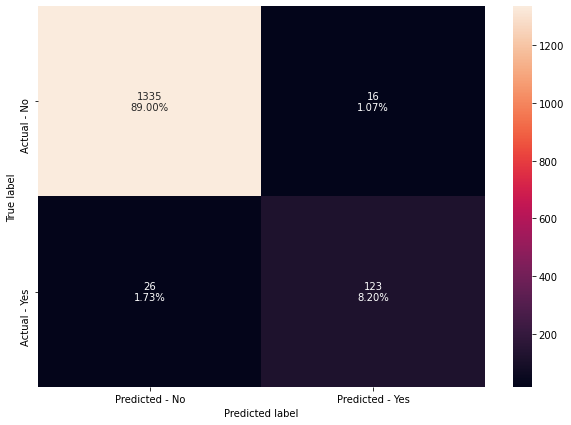

In [58]:
make_confusion_matrix(d_tree,y_test)

In [59]:
get_recall_score(d_tree)

Recall on training set :  1.0
Recall on test set :  0.825503355704698
Recall Train/Test Delta 0.17449664429530198


Recall is 0.15 different from train to test... Looks like the model is overfit --- NEEDS PRUNING

In [60]:
feature_names = list(X.columns)
print(feature_names)

['ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'age_range_Under 30', 'age_range_30 - 40', 'age_range_40 - 50', 'age_range_Over 50', 'exp_range_Under 10', 'exp_range_10 - 20', 'exp_range_20 - 30', 'exp_range_Over 30', 'income_range_Under 50', 'income_range_50-100', 'income_range_100-150', 'income_range_150-200', 'income_range_200+']


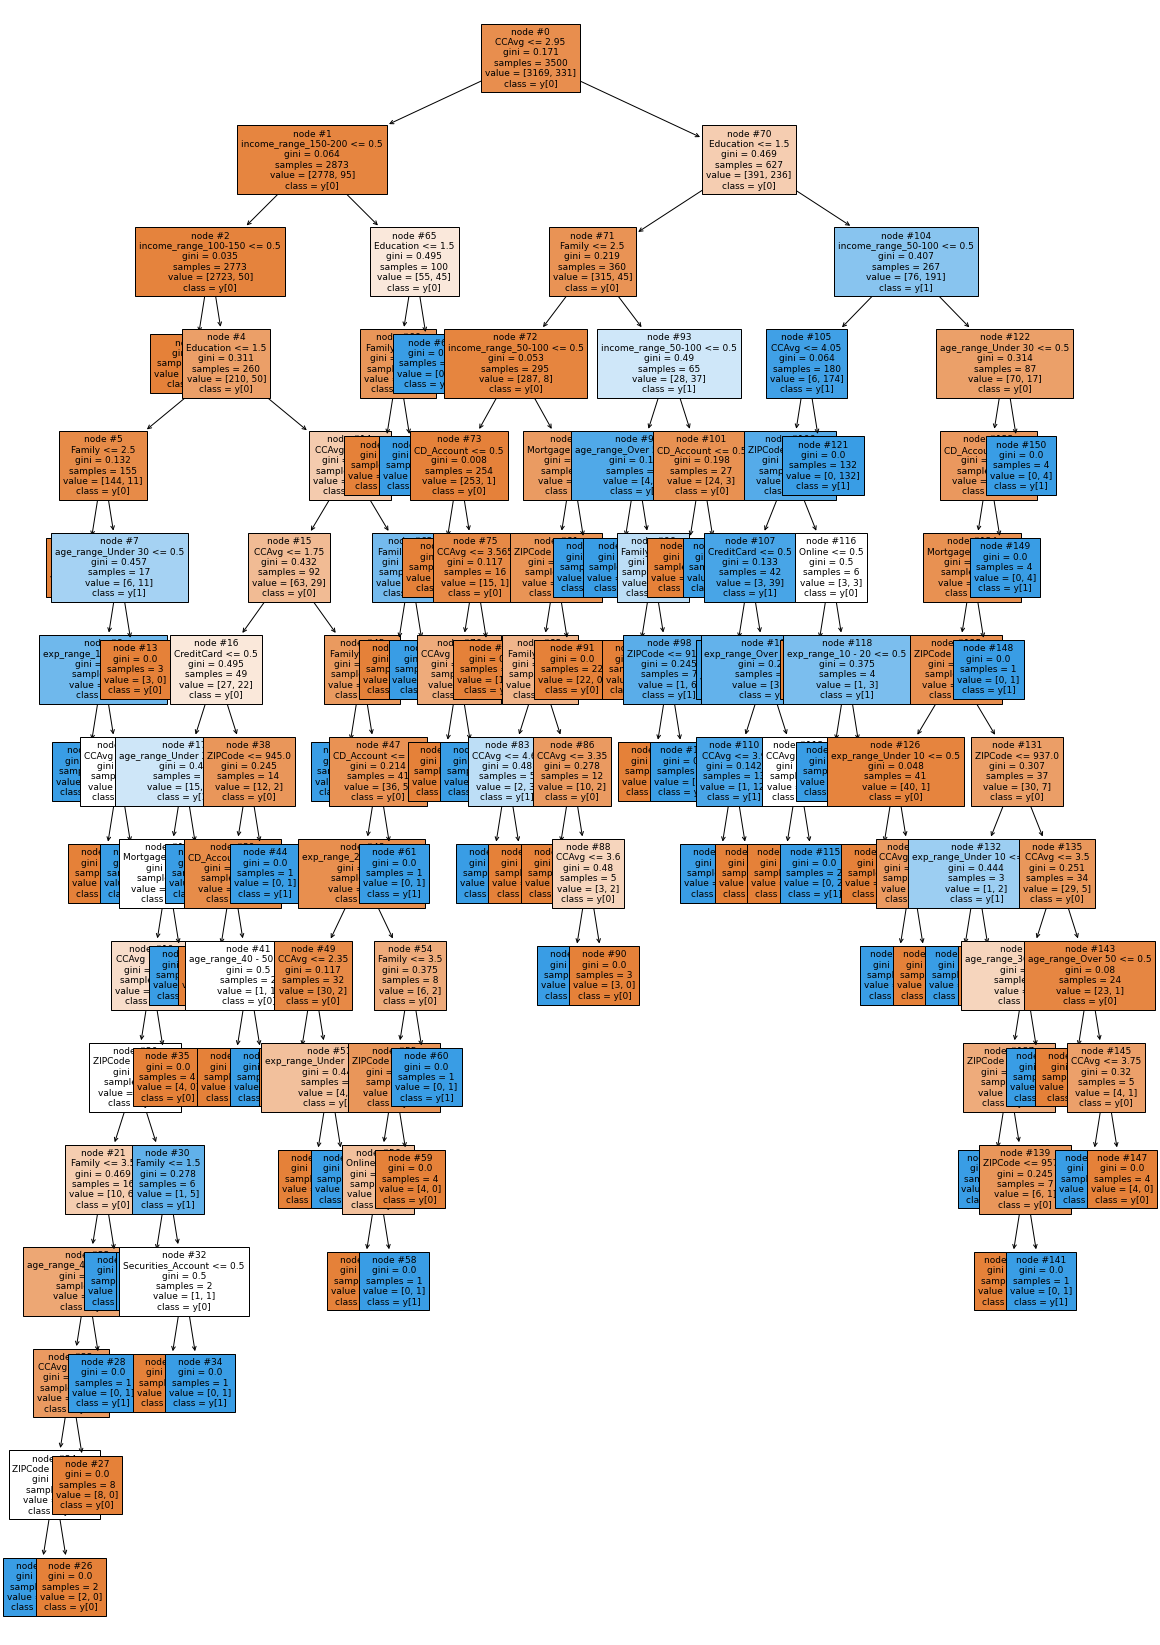

In [61]:
plt.figure(figsize=(20,30))
tree.plot_tree(d_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [62]:
print (pd.DataFrame(d_tree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
CCAvg                  0.257803
Education              0.253907
income_range_50-100    0.152033
Family                 0.127218
income_range_150-200   0.060095
income_range_100-150   0.029075
ZIPCode                0.027768
CD_Account             0.023116
age_range_Under 30     0.017721
Mortgage               0.011328
CreditCard             0.007180
exp_range_Under 10     0.007148
exp_range_10 - 20      0.005363
Online                 0.004727
age_range_Over 50      0.004462
age_range_40 - 50      0.003807
age_range_30 - 40      0.003003
exp_range_Over 30      0.001827
Securities_Account     0.001668
exp_range_20 - 30      0.000751
income_range_Under 50  0.000000
income_range_200+      0.000000


# Most important features: 

CCAvg , Education, Family and Income(50-100k)

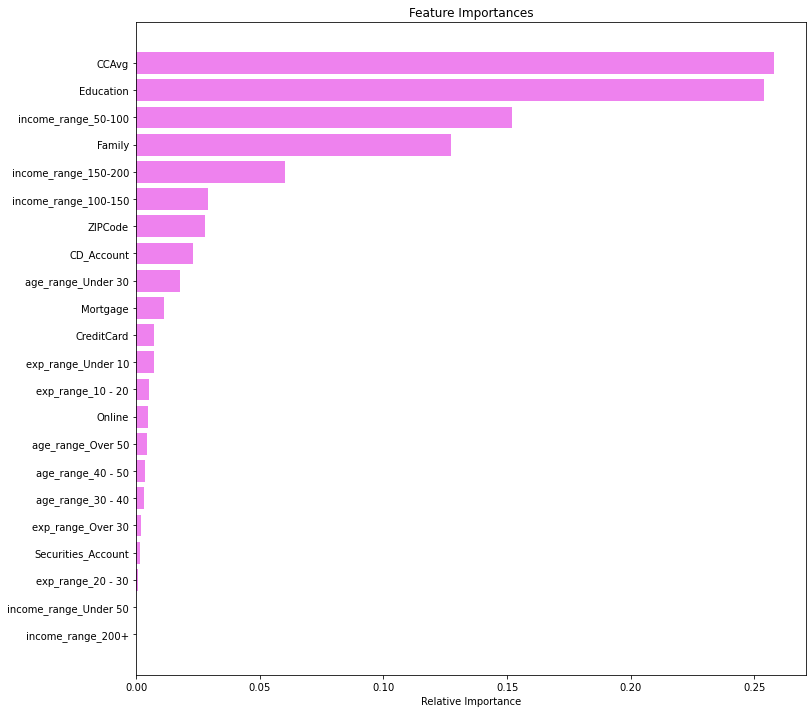

In [63]:
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Pre-Prune Decision Tree with max_depth to lower complexity

In [64]:
# setting up a list to loop through
levels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
# creating a function to run the Decision Tree function through and try multiple max_depths 
def tree_maker(current_depth):
    print('\n new level:', current_depth) # Will print 'new level' and separate each loop's results
    d_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth = current_depth)
    d_tree.fit(X_train, y_train)
    print('\n')
    print("Accuracy on training set : ",d_tree.score(X_train, y_train))
    print("Accuracy on test set : ",d_tree.score(X_test, y_test))
    
    return(get_recall_score(d_tree))

In [66]:
# run through levels 1 through 8, trying the tree_maker function each time
for ea in levels:
    tree_maker(ea)


 new level: 1


Accuracy on training set :  0.9054285714285715
Accuracy on test set :  0.9006666666666666
Recall on training set :  0.0
Recall on test set :  0.0
Recall Train/Test Delta 0.0

 new level: 2


Accuracy on training set :  0.9382857142857143
Accuracy on test set :  0.93
Recall on training set :  0.5770392749244713
Recall on test set :  0.5234899328859061
Recall Train/Test Delta 0.053549342038565206

 new level: 3


Accuracy on training set :  0.9662857142857143
Accuracy on test set :  0.958
Recall on training set :  0.7462235649546828
Recall on test set :  0.6577181208053692
Recall Train/Test Delta 0.0885054441493136

 new level: 4


Accuracy on training set :  0.976
Accuracy on test set :  0.964
Recall on training set :  0.7764350453172205
Recall on test set :  0.6912751677852349
Recall Train/Test Delta 0.08515987753198562

 new level: 5


Accuracy on training set :  0.982
Accuracy on test set :  0.9646666666666667
Recall on training set :  0.8580060422960725
Recall on te

# Observations: 
* Level 7 looks like it has the best model - Recall on test drops on level 8
* However, the fact that there is a large spread (delta = 0.135) between recall's train/test is a concern

Now run the accuracy, confusion matrix with max_depth = 7

In [67]:
d_tree2 = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth = 7)
d_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

In [68]:
print("Accuracy on training set : ",d_tree2.score(X_train, y_train))
print("Accuracy on test set : ",d_tree2.score(X_test, y_test))

Accuracy on training set :  0.9885714285714285
Accuracy on test set :  0.9666666666666667


Accuracy: test vs train both good, but still a couple of percent off.. Now check Recall

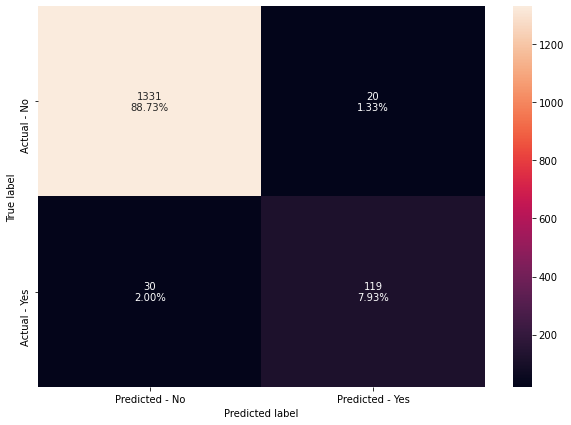

In [69]:
cm1 = make_confusion_matrix(d_tree2,y_test)
cm1

In [113]:
help(sklearn.tree._tree.Tree)

NameError: name 'sklearn' is not defined

In [112]:
type(d_tree2)

sklearn.tree._classes.DecisionTreeClassifier

In [70]:
get_recall_score(d_tree2)

Recall on training set :  0.9335347432024169
Recall on test set :  0.7986577181208053
Recall Train/Test Delta 0.1348770250816116


In [71]:
y_test.shape

(1500,)

# Tuning with Grid Search

In [73]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10,15, None], 
              'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

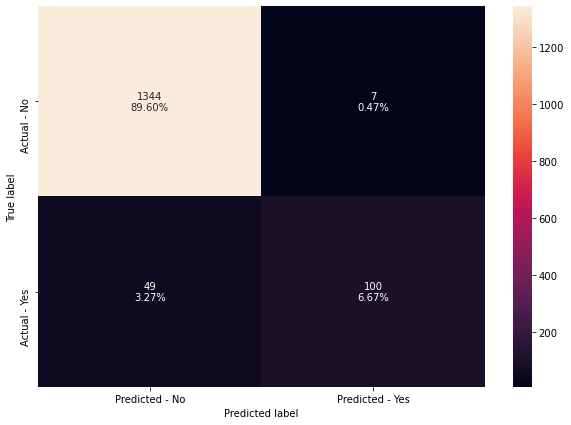

In [74]:
make_confusion_matrix(estimator,y_test)

In [75]:
get_recall_score(estimator)

Recall on training set :  0.7643504531722054
Recall on test set :  0.6711409395973155
Recall Train/Test Delta 0.09320951357488994


# Observations:
* The GridSearch Model performs more poorly than the max_level 7 version
* On one hand, the False Positive went down 
* BUT the False Negatives went UP - This is a negative feature because we would miss out on loans 
* it's no big deal on the False Positive, because if we predict they Yes and it turns out No on a loan - we aren't out anything

GridSearch Not Good - 0.76/0.67

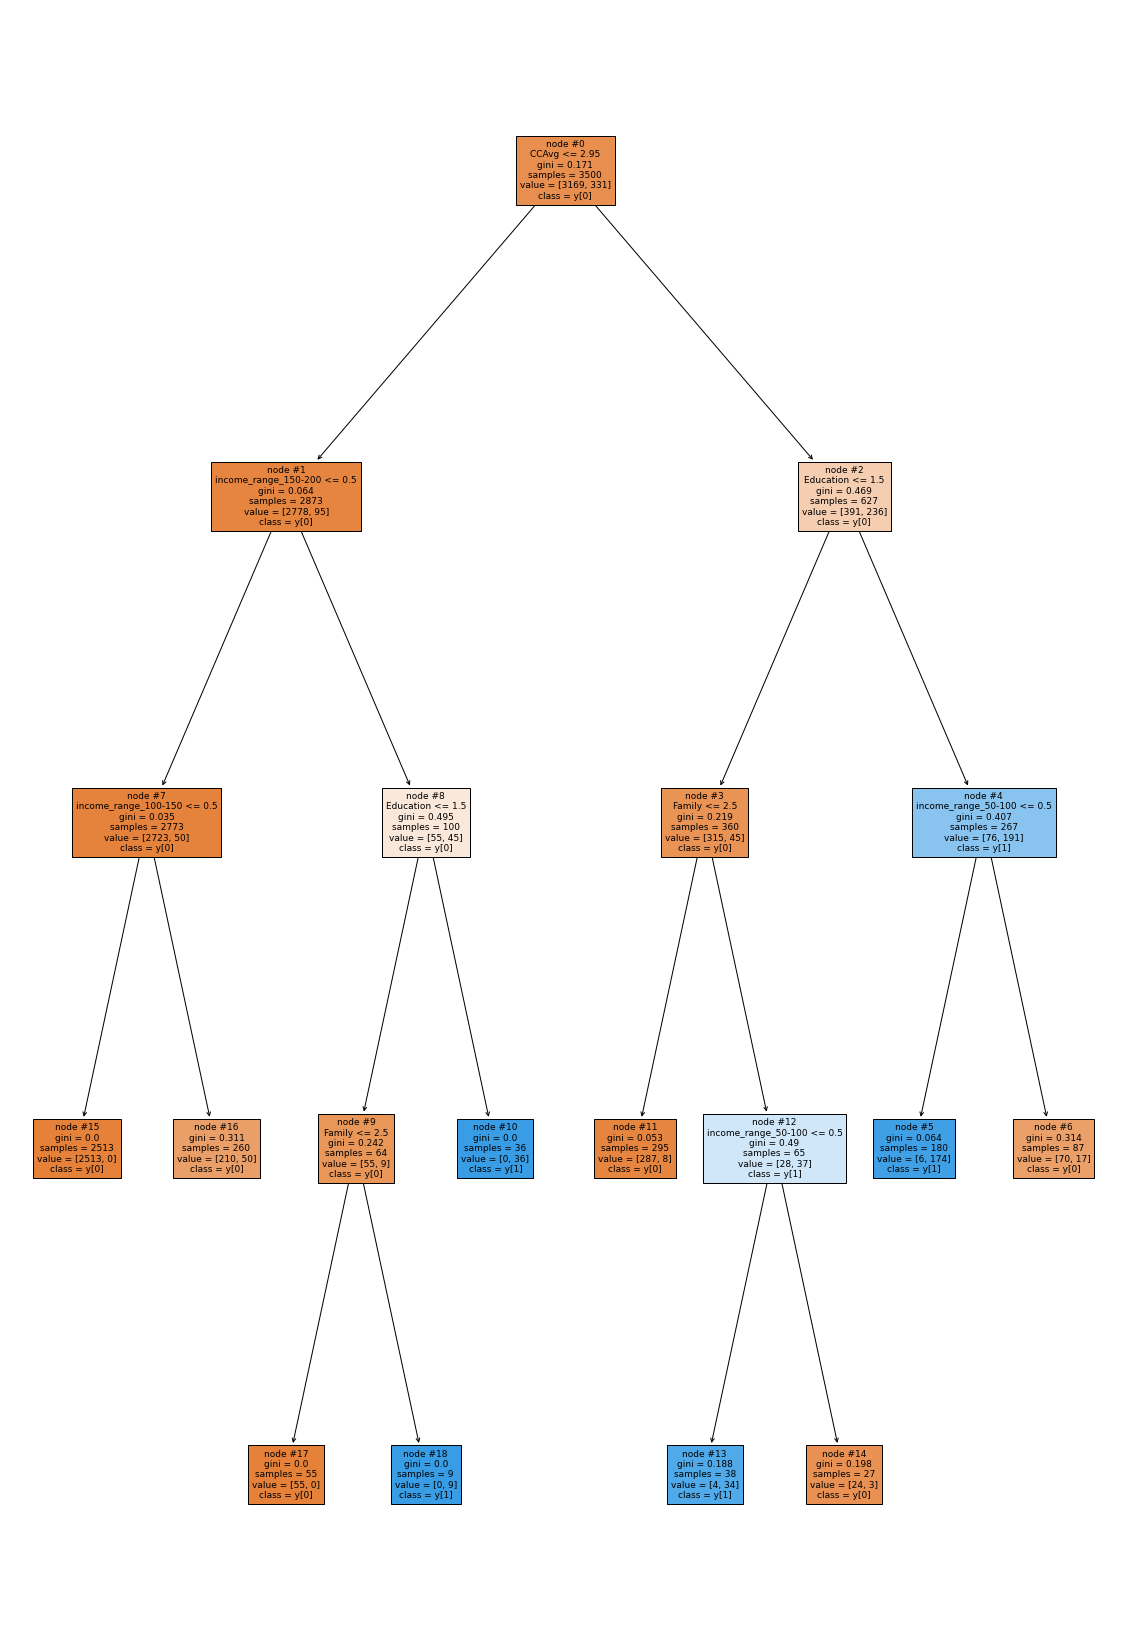

In [76]:
plt.figure(figsize=(20,30))
tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

# Cost Complexity Pruning

Starting from the Full tree, create a sequence of trees that are
sequentially smaller (pruned)

• At each step the algorithm

•try removing each possible subtree

•find the ‘relative error decrease per node’ for that subtree -Complexity parameter,

•And remove the subtree with the minimum • With the list of subtrees, one usually reverts back to using crossvalidation
errors to find the best final pruned tree

In [77]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

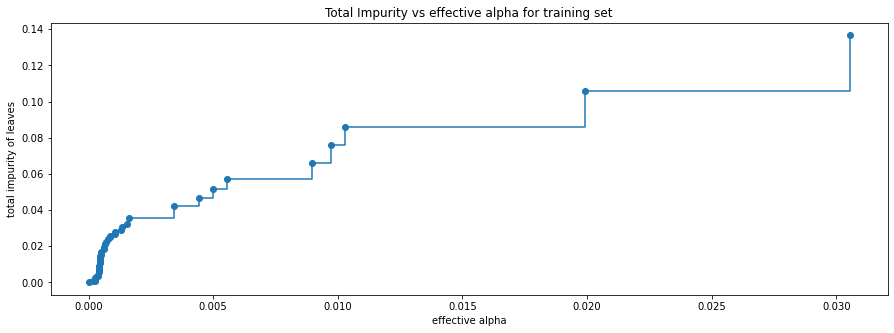

In [78]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [79]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03466715367613599


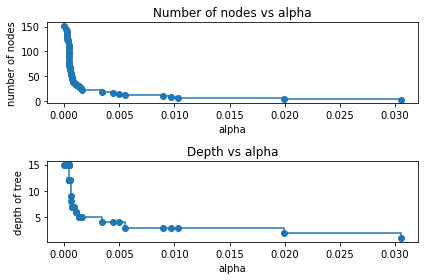

In [80]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

From above, it appears that either alpha = 0.005 or 0.010 would be the optimal value to balance Accuracy vs Alpha

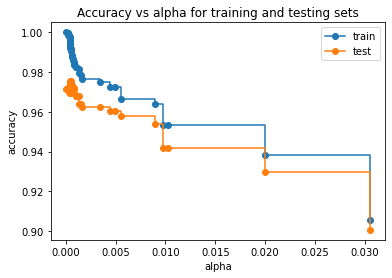

In [81]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Now - Recall vs alpha 

In [82]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [83]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [84]:
recall_test

[0.825503355704698,
 0.825503355704698,
 0.8389261744966443,
 0.8389261744966443,
 0.8322147651006712,
 0.8187919463087249,
 0.8187919463087249,
 0.8187919463087249,
 0.8187919463087249,
 0.8187919463087249,
 0.8187919463087249,
 0.8053691275167785,
 0.8053691275167785,
 0.8322147651006712,
 0.825503355704698,
 0.825503355704698,
 0.825503355704698,
 0.8053691275167785,
 0.8053691275167785,
 0.8053691275167785,
 0.8120805369127517,
 0.8053691275167785,
 0.7718120805369127,
 0.825503355704698,
 0.8389261744966443,
 0.8389261744966443,
 0.8456375838926175,
 0.8389261744966443,
 0.8389261744966443,
 0.7785234899328859,
 0.7785234899328859,
 0.7919463087248322,
 0.738255033557047,
 0.738255033557047,
 0.7181208053691275,
 0.6711409395973155,
 0.6510067114093959,
 0.6510067114093959,
 0.6577181208053692,
 0.5704697986577181,
 0.44966442953020136,
 0.44966442953020136,
 0.5234899328859061,
 0.0]

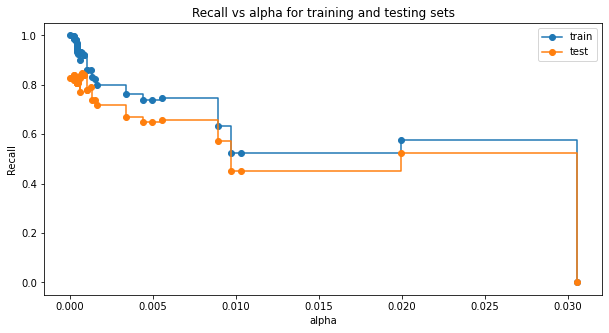

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

From both graphs: Accuracy vs Alpha AND Recall vs Alpha, they both look like the best alpha is either 0.005 or 0.01

In [86]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0007776584317937701, random_state=0)


In [87]:
print(type(clfs[0]))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [88]:
get_recall_score(best_model)

Recall on training set :  0.9274924471299094
Recall on test set :  0.8456375838926175
Recall Train/Test Delta 0.08185486323729196


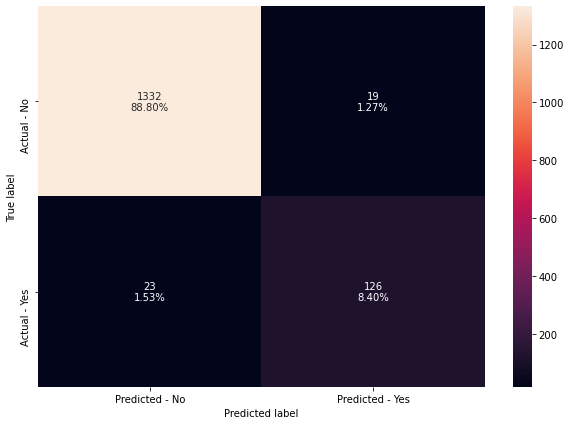

In [89]:
make_confusion_matrix(best_model,y_test)

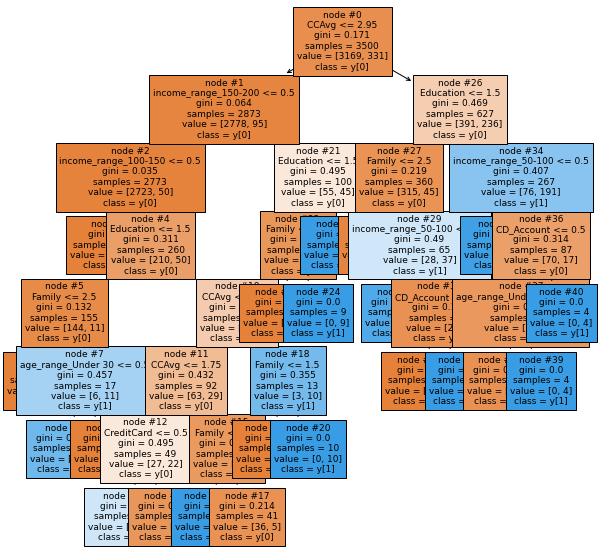

In [90]:
plt.figure(figsize=(10,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()
plt.show()

I think this Cost Complexity Pruning is a slightly better model (vs. pre-pruning model), but is still fairly complex

# Logistical Regression

In [91]:
import statsmodels.api as sm

In [92]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
logit = sm.Logit(y_train, X_train)

lg = logit.fit()

print(lg.summary())

         Current function value: 0.114280
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3479
Method:                           MLE   Df Model:                           20
Date:                Tue, 01 Jun 2021   Pseudo R-squ.:                  0.6349
Time:                        05:33:11   Log-Likelihood:                -399.98
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.627e-283
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -9.0309        nan        nan        nan         nan         nan
ZIPCode                   0.0001

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

ZIPCode                   1.006785
Family                    1.050395
CCAvg                     1.672204
Education                 1.062237
Mortgage                  1.052198
Securities_Account        1.140444
CD_Account                1.347597
Online                    1.043034
CreditCard                1.109606
age_range_Under 30             inf
age_range_30 - 40              inf
age_range_40 - 50              inf
age_range_Over 50              inf
exp_range_Under 10        9.565036
exp_range_10 - 20        10.169997
exp_range_20 - 30        10.414966
exp_range_Over 30         9.966539
income_range_Under 50          inf
income_range_50-100            inf
income_range_100-150           inf
income_range_150-200           inf
income_range_200+              inf
dtype: float64



Dropping insignificant or highly collinear values

In [94]:
# Recursively dropping one Column at a time and re-running this cell - until VIF values are below 5.0
X_train1 = X_train.drop(['age_range_Under 30','income_range_Under 50','exp_range_10 - 20','age_range_Over 50', 'ZIPCode'], axis=1)
vif_series1 = pd.Series([variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])], index=X_train1.columns)
print('Series before feature selection:  \n\n{}\n'.format(vif_series1))

Series before feature selection:  

const                   26.741551
Family                   1.049155
CCAvg                    1.683749
Education                1.062556
Mortgage                 1.048027
Securities_Account       1.148709
CD_Account               1.373912
Online                   1.043889
CreditCard               1.110425
age_range_30 - 40        1.841866
age_range_40 - 50        1.777395
exp_range_Under 10       1.771659
exp_range_20 - 30        1.816718
exp_range_Over 30        2.446778
income_range_50-100      1.344804
income_range_100-150     1.619387
income_range_150-200     1.729196
income_range_200+        1.100484
dtype: float64



In [95]:
X_test1 = X_test.drop(['age_range_Under 30','income_range_Under 50','exp_range_10 - 20','age_range_Over 50', 'ZIPCode'], axis=1)

In [96]:
logit1 = sm.Logit(y_train, X_train1 )
lg1 = logit1.fit()
print(lg1.summary2())

# Let's Look at Model Performance
y_pred = lg1.predict(X_train1)
pred_train = list(map(round, y_pred))

y_pred1 = lg1.predict(X_test1)
pred_test = list(map(round, y_pred1))

print('Recall on train data:',metrics.recall_score(y_train, pred_train) )
print('Recall on test data:',metrics.recall_score(y_test, pred_test))

         Current function value: 0.114480
         Iterations: 35
                             Results: Logit
Model:                Logit              Pseudo R-squared:   0.634      
Dependent Variable:   Personal_Loan      AIC:                837.3630   
Date:                 2021-06-01 05:33   BIC:                948.2523   
No. Observations:     3500               Log-Likelihood:     -400.68    
Df Model:             17                 LL-Null:            -1095.5    
Df Residuals:         3482               LLR p-value:        2.7078e-285
Converged:            0.0000             Scale:              1.0000     
No. Iterations:       35.0000                                           
------------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|    [0.025   0.975] 
------------------------------------------------------------------------
const                -22.3963 113.2929 -0.1977 0.8433 -244.4464 199.6537
Family        

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Observations:
* The Logistical Regression Results are poor (0.6948/.6778) compared to the previous Decision Tree Model
* Age has p-values over 0.05, and low coefficient values - so let's drop them
* Also, all of the incomes are high p-value BUT also high Coefficient - Suspect collinearity, SO drop only 1 of them

In [97]:
# MODEL 2
# AGE has highest p values among those with p-value greater than 0.05
X_train2 = X_train1.drop(['age_range_30 - 40','age_range_40 - 50','income_range_50-100'], axis =1)
X_test2 = X_test1.drop(['age_range_30 - 40','age_range_40 - 50','income_range_50-100'],axis =1)

logit2 = sm.Logit(y_train, X_train2 )
lg2 = logit2.fit()
print(lg2.summary2())

# Let's Look at Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',metrics.recall_score(y_train, pred_train) )
print('Recall on test data:',metrics.recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.118541
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.621      
Dependent Variable:    Personal_Loan     AIC:               859.7845   
Date:                  2021-06-01 05:33  BIC:               952.1922   
No. Observations:      3500              Log-Likelihood:    -414.89    
Df Model:              14                LL-Null:           -1095.5    
Df Residuals:          3485              LLR p-value:       3.7725e-282
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
const                -10.6797   0.5742 -18.6006 0.0000 -11.8051

* Not much change in Recall
* before (0.6948/.6778)
* after (.6918 / .6778)
* high p-value in experience - let's drop them

In [98]:
# MODEL 3
# Experience has highest p values among those with p-value greater than 0.05
X_train3 = X_train2.drop(['exp_range_Under 10','exp_range_20 - 30', 'exp_range_Over 30'], axis =1)
X_test3 = X_test2.drop(['exp_range_Under 10','exp_range_20 - 30', 'exp_range_Over 30'],axis =1)

logit3 = sm.Logit(y_train, X_train3 )
lg3 = logit3.fit()
print(lg3.summary2())

# Let's Look at Model Performance
y_pred = lg3.predict(X_train3) 
pred_train = list(map(round, y_pred))

y_pred1 = lg3.predict(X_test3) 
pred_test = list(map(round, y_pred1))

print('Recall on train data:',metrics.recall_score(y_train, pred_train) )
print('Recall on test data:',metrics.recall_score(y_test, pred_test))

Optimization terminated successfully.
         Current function value: 0.118995
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.620      
Dependent Variable:    Personal_Loan     AIC:               856.9645   
Date:                  2021-06-01 05:33  BIC:               930.8908   
No. Observations:      3500              Log-Likelihood:    -416.48    
Df Model:              11                LL-Null:           -1095.5    
Df Residuals:          3488              LLR p-value:       1.4152e-284
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        9.0000                                          
-----------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
const                -10.6559   0.5483 -19.4342 0.0000 -11.7305

# Observations
* before (.6918 / .6778)
* after (.7039 / .6711)
* Train Recall went slightly up, but Test Recall slightly down -- Therefore, let's stick with MODEL 2 (lg2)

* Check Model Performance

In [99]:
# Model Performance
y_pred = lg2.predict(X_train2) 
pred_train = list(map(round, y_pred))

y_pred1 = lg2.predict(X_test2) 
pred_test = list(map(round, y_pred1))

In [100]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [101]:
#Model performance with 0.5 threshold

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train))
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.96
Accuracy on test data: 0.9513333333333334
Recall on train data: 0.6918429003021148
Recall on test data: 0.6778523489932886
Precision on train data: 0.8576779026217228
Precision on test data: 0.8015873015873016
f1 score on train data: 0.7658862876254181
f1 score on test data: 0.7345454545454545


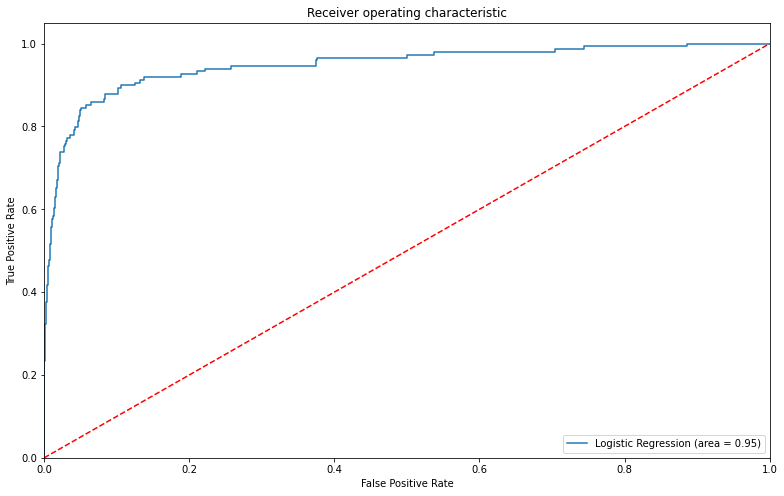

In [102]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [103]:
# find the optimal threshold to maximize recall
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.11578250634365184


In [104]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [105]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9188571428571428
Accuracy on test data: 0.9066666666666666
Recall on train data: 0.9244712990936556
Recall on test data: 0.8859060402684564
Precision on train data: 0.5415929203539823
Precision on test data: 0.5176470588235295
f1 score on train data: 0.6830357142857142
f1 score on test data: 0.6534653465346536


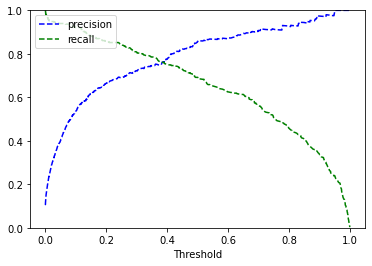

In [106]:
from sklearn.metrics import precision_recall_curve

y_scores=lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores, )

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

# Observation:
* Precision has 'exponentional decay' at approximately 0.2 threshold..
* Thefore, optimal threshold is somewhere between 0.2 and 0.4 - Let's try 0.2
* After trying a few different threshold values, we can handle a few 'Type 1 Error' and allow for a lower precision 

In [107]:
optimal_threshold = 0.1

# Model prediction with optimal threshold
pred_train_opt = (lg2.predict(X_train2)>optimal_threshold).astype(int)
pred_test_opt = (lg2.predict(X_test2)>optimal_threshold).astype(int)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.9171428571428571
Accuracy on test data: 0.8986666666666666
Recall on train data: 0.9214501510574018
Recall on test data: 0.8791946308724832
Precision on train data: 0.5360281195079086
Precision on test data: 0.49433962264150944
f1 score on train data: 0.6777777777777778
f1 score on test data: 0.6328502415458936


# Observation: 
* After trying 0.2 and 0.3 - The Recall values came down in both instances
* Going to 0.1, gets to a recall of 92/88%. The Precision is still 53% but shouldn't be a problem for the marketing group.. This just means that they will false identify some customers, but we are maximizing the potential for new Asset Customers

In [108]:
from sklearn.metrics import classification_report,confusion_matrix


def make_confusion_matrix2(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

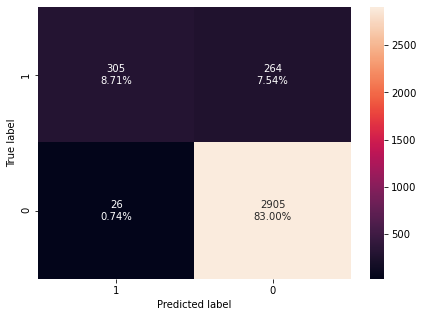

In [109]:
make_confusion_matrix2(y_train,pred_train_opt)


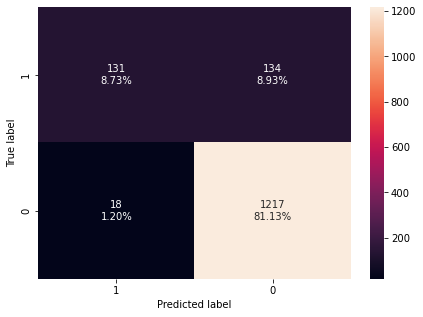

In [110]:
make_confusion_matrix2(y_test,pred_test_opt)